---
## Step 0. Before starting
### 0-1. Update R
1. Download binaries (Run R-3.X.X-win.exe) from https://www.r-project.org/.
2. Run R-3.X.X-win.exe
3. Set system path.
    - Type "env" in the Start button and select "Edit the system environment variables".
    - Push "Environment Variables..." button.
    - Change "Path" variable.
4. Install IRkernel for Jupyter
    - in Anaconda prompt (Admin)
    ```
    > R
    > install.packages('IRkernel')
    > IRkernel::installspec()
    ```
    
### 0-2. How to nstall packages
**Only for the first installation**, open command window.<BR>
**\<on Win10\ as regular user>**
```
C:\Users\User>R
> install.packages("ggpubr")
```
It will ask if you want to create personal for installation. Answer with **"yes"**. Once you do so, you can install additional packages from Jupyter.

**\<on Ubuntu\>**
```
$ sudo R
> install.packages("ggpubr")
```

**\<using Jupyter\>**

In [ ]:
install.packages("magrittr")

### 0-3. Useful packages
- **ggpubr**: 'ggplot2' Based Publication Ready Plots<BR>
https://cran.r-project.org/web/packages/ggpubr/index.html<BR>
- **magrittr**: It provides a new **“pipe”-like operator**, %>%<BR>
https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html    
- **stringr**: Simple, Consistent Wrappers for **Common String Operations**<BR>
https://www.rdocumentation.org/packages/stringr/versions/1.4.0<BR>
    used as `for (colname in str_subset(names(df), rex)){` in the function conv_str2list().
- **hablar**: Simple tools for **converting columns to new data types**. Intuitive functions for columns with missing values.<BR>
https://cran.r-project.org/web/packages/hablar/<BR>
    used as `convert(lgl(single_animal))`.
- **dplyre**: dplyr is a grammar of data manipulation, providing a consistent set of verbs that help you solve the most common data manipulation challenges.<BR>
https://dplyr.tidyverse.org/<BR>
    used as `not yet`.

### 0-4. Check R version

In [1]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

---
## Step 1. Package preparation
### 1-1. Install packages

In [2]:
# Install packages

install.packages("magrittr")
install.packages("hablar")
install.packages("ggbeeswarm")
install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("stringr")
install.packages("Rmisc")
install.packages("e1071")
install.packages("writexl")

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'hablar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ggbeeswarm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'Rmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp6NvHNv\downloaded_packages


### 1-2. Load libraries

In [1]:
# Load required library
library(Rmisc)
library(hablar)
library(tidyverse)
# library(dplyr)

path = "W:/wataru/jupyter/synchro_freeze"
base = "synchro_freeze.R"
filename = file.path(path, base)
source(filename)

library(magrittr)
library(ggplot2)
library(ggpubr) # ggplot2 based publication ready plots
library(ggbeeswarm)

#library(Rmisc)

library(writexl)

Loading required package: lattice

Loading required package: plyr

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.0     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::na_if()     masks hablar::na_if()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise() masks plyr::summarise()
x dplyr::summarize() masks plyr::summarize()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The followin

---
## Step 2. Import CSV file and save as R data frame

In [2]:
#######################################
# Load the big table into t1
# R accepts both ways to describe path.
# filename <- "C:\\Users\\User\\Desktop\\project\\summary3.csv"

path = "W:/videos_synchrony"
base = "summary4.csv"
filename = file.path(path, base)
t1 = read.table(file=filename,header=TRUE, sep=",")
t1 = t1 %>% convert(lgl(single_animal))

# Load groups table into t2
base = "IVs.csv"
filename = file.path(path, base)
t2 = read.table(file=filename,header=TRUE, sep=",")
t2 = t2 %>% convert(lgl(single_animal))

#######################################
# merge two data frames by IDs
df <- merge(t2, t1, by=c("folder_videoname","single_animal"))
# rename of column names may be necessary
#names(df)[names(df) == "single_animal.x"] <- "single_animal"

#######################################
# Post process
# Convert strings to integer list
rex = "fz_start*|fz_end*|lagt_*"
df = conv_str2list(df, rex)

# Adjust dtype
df = df %>% convert(chr(folder_videoname,sex,familiarity,lighting,stress,comment,infusion_hpc,infusion_pfc))

# Set NA for empty cell
df[df==""]<-NA
# df[is.nan(df)] <- NA

#######################################
# Exclude records
cat("Exclude", nrow(df[df$exclude==TRUE,]), "records from", nrow(df), "records\n")
df = df[df$exclude!=TRUE,]
cat("Remaining records are", nrow(df), "\n")

#######################################
# convert tibble to data.frame
df = as.data.frame(df)

#######################################
# Display summary
dis_summary(df)

# if(which(df$single_animal.x != df$single_animal.y) == FALSE){
#     print("folder_videoname and single_animal are consistent.")
# } else {
#     print("something is wrong")
# }

#######################################
# Save DF and Excel
df.input = df
path = "W:/videos_synchrony"
base = "data"
save_files(df.input,path,base)

df.input = df
path = "W:/wataru/jupyter/synchro_freeze"
base = "data"
save_files(df.input,path,base)

Exclude 57 records from 322 records
Remaining records are 265 
dimension:  265 48 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         infusion_IP         familiarity 
        "character"         "character"            "factor"         "character" 
           lighting           partition              stress   together_alone_id 
        "character"           "logical"         "character"            "factor" 
together_alone_role             exclude             comment        video_system 
           "factor"           "logical"         "character"            "factor" 
            fz_sub1             fz_sub2          fz_overlap             cohen_d 
          "numeric"           "numeric"           "numeric"           "numeric" 
          s_count_0           s_count_1           s_count_2           s_count_3 
          "integer"       

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,infusion_IP,familiarity,lighting,partition,...,st_count_32,st_count_33,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<chr>,<lgl>,...,<int>,<int>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,NA,familiar,visible,FALSE,...,0,0,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,NA,familiar,visible,FALSE,...,0,0,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


---
## Step 3. Sex and stress effects on synchronization
**Load R dataframe**

In [3]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  216 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lag

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Exclude single animal, infusion, lighting and partition experiments**<BR>
It's good to check using the data frame viewer in RStudio.

In [4]:
df.set1 <- subset(df, 
                  single_animal==FALSE & 
                  is.na(infusion_hpc) &
                  is.na(infusion_pfc) & 
                  familiarity=='familiar' &
                  lighting =='visible' & 
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

# Output data frame as well as Excel file (not included columns of list)
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base= "data_set1"
save_files(df.input,path,base)

dimension:  55 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


**Change order of individual variables**<BR>
    Explicitly set the order in individual valiables

In [5]:
df.set1 <- within(df.set1, sex <- factor(sex, levels = c("male","female")))
df.set1 <- within(df.set1, stress <- factor(stress, levels = c("no_stress","stress")))

**Plot Cohen D with SEM errorbar from familiar male and female pairs**<BR>
Remaining independent variables are sex, familiarity and stress.

- **ggplot2 dot plot : Quick start guide - R software and data visualization**<BR>
http://www.sthda.com/english/wiki/ggplot2-dot-plot-quick-start-guide-r-software-and-data-visualization

- **Multiple graphs on one page (ggplot2)**<BR>
http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
- **ggplot2 まとめ: 初歩から程よいレベルまで (in Japanese)**<BR>
https://mrunadon.github.io/images/geom_kazutanR.html 
- **Beautiful plotting in R: A ggplot2 cheatsheet**<BR>
http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/
- **Complete themes**<BR>
    https://ggplot2.tidyverse.org/reference/ggtheme.html
- **Resizing plots in the R kernel for Jupyter notebooks**<BR>
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html        
- **GGPLOT LEGEND TITLE, POSITION AND LABELS**<BR>
 https://www.datanovia.com/en/blog/ggplot-legend-title-position-and-labels/   
- **Arrange Multiple ggplots**<BR>
    https://rpkgs.datanovia.com/ggpubr/reference/ggarrange.html

- **Basic statistical tests Using R**<BR>
    https://www.dataanalytics.org.uk/basic-statistical-tests-using-r/
    
   
Other decoration for plots not used below

    # Gray plot
    # scale_fill_grey() + theme_classic()+
    # add error bar in SD
    # stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), geom="errorbar", color="red", width=0.2)+
    # add mean red point
    # stat_summary(fun=mean, geom="point", color="red")

## Plot Cohen D for each sex with/without stress

stress : no_stress , sex : female , min: -1.150091 , mean: 1.009998 , max: 2.437512 , n: 16 , sd: 1.098654 
stress : no_stress , sex : male , min: 0.7262769 , mean: 2.048165 , max: 3.344061 , n: 17 , sd: 0.9557928 
stress : stress , sex : female , min: 0.1903046 , mean: 2.225274 , max: 4.334237 , n: 9 , sd: 1.533727 
stress : stress , sex : male , min: -1.809506 , mean: 0.2413453 , max: 2.296196 , n: 13 , sd: 1.112518 


Warning message:
"Removed 4 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."


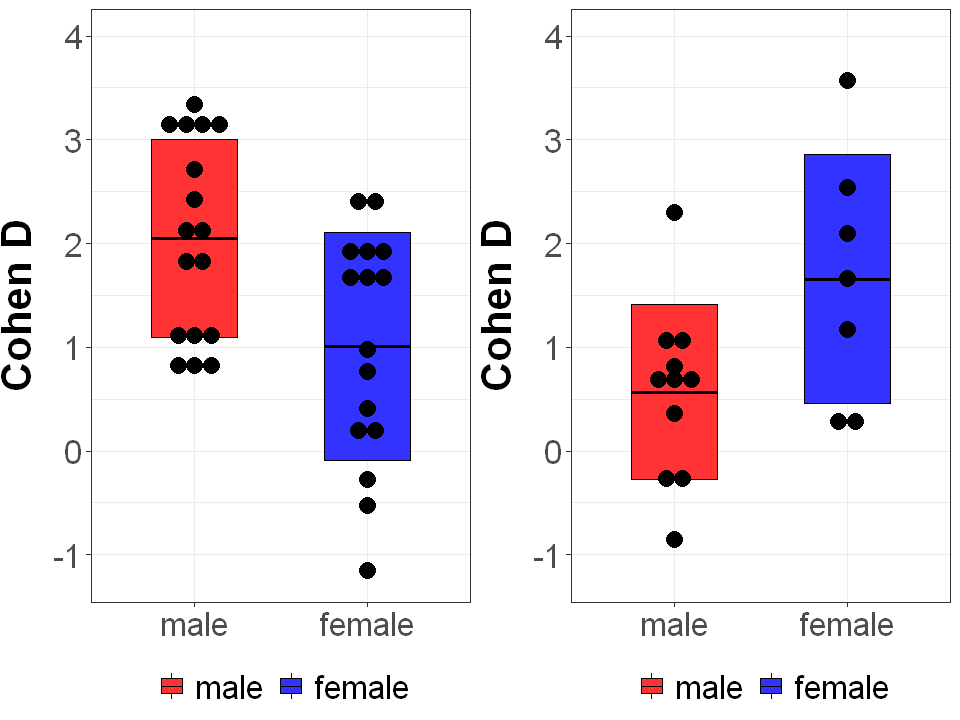

In [24]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.2
    dp_dotsize=0.8
    
    # y limits
    ylim1 = -1.2
    ylim2 = 4.0
    
#     ylim1 = -2.5
#     ylim2 = 4.5

    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################
# plot no stressed animals
df.input = df.set1       # data frame
x_col = "sex"            # x-axis is sex
y_col = "cohen_d"        # y-axis is cohen_d
select_col = "stress"
select_value = "no_stress"  # limit records with stress in the stress column
y_axis_label = "Cohen D" # y-asix label

out1_1 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot stressed animals
select_col = "stress"
select_value = "stress"  # limit record with stress column is stress

out1_2 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot the two plots together
# set the size of final plot, width x height
plot_width = 8
plot_height= 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out1_1, out1_2, ncol=2)



**Export the plot as an eps file**

In [25]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**1-sample t-test**
- R - Mean, Median and Mode
https://www.tutorialspoint.com/r/r_mean_median_mode.htm

- 13.3 T-test: t.test()
https://bookdown.org/ndphillips/YaRrr/t-test-t-test.html
    


In [10]:
one_sample_t_test <- function(df.input, y_col, x1_col, x1_value, x2_col, x2_value){
#############################################################
# 1 sample t-test for (y_col), where
#     (x1_col) = x1_value
#     (x2_col) = x2_value
# hypothetical value (mu = 0)
#############################################################
    # get index for each column name
    #    you can use either forms work
#     x1 <- which (colnames(df.input)==x1_col)
#     x2 <- which (colnames(df.input)==x2_col)
#     y <- which (colnames(df.input)==y_col)
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==x2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame to vector
    temp = df.input[,y][df.input[,x1]==x1_value & df.input[,x2]==x2_value]
    
    cat(paste0('### (',x1_value,", \t",x2_value, ") \t###\t"))
    temp.test <- t.test(temp, mu=0)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    # print(temp.test)

    return(temp.test)
}
for (sex in c("male","female")){
    for (stress in c("stress", "no_stress")){
        temp = one_sample_t_test(df.set1,"cohen_d", "sex",sex,"stress",stress)
    }
}


### (male, 	stress) 	###	p-value:  0.4492714 
### (male, 	no_stress) 	###	p-value:  1.493917e-07 
### (female, 	stress) 	###	p-value:  0.00243649 
### (female, 	no_stress) 	###	p-value:  0.002241291 


**2-sample t-test**
    
    Need to set "var.equal = TRUE" in t.test
- **t-tests**
    https://www.statmethods.net/stats/ttest.html

In [26]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b, var.equal = TRUE)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)

    return(temp.test)
}

for (sex1 in c("male", "female")){
    for (sex2 in c("male", "female")){
        for (stress1 in c("stress","no_stress")){
            for (stress2 in c("stress","no_stress")){
                temp = two_sample_t_test(df.set1, "cohen_d","sex",sex1,"stress",stress1,"sex",sex2,"stress",stress2)
}}}}


### (male, 	stress) 	vs. (male, 	stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  5.05796e-05 
### (male, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  5.05796e-05 
### (male, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (female, 	stress) 	###	p-value:  0.002122806 
### (male, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.07334343 
### (male, 	no_stress) 	vs. (female, 	stress) 	###	p-value:  0.7190451 
### (male, 	no_stress) 	vs. (female, 	no_stress) 	###	p-value:  0.006784861 
### (female, 	stress) 	vs. (male, 	stress) 	###	p-value:  0.002122806 
### (female, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.7190451 
### (female, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.07334343 
### (female, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  0.006784861 
### (female, 	stress) 	vs. (female, 	stress) 	###	p-value:  1 
### (female, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.03073199 
### (fem

---
## Step 4. Sex and stress effects on freezing
**Compute the average from sub1 and sub2 freezing into a new column 'fz_ave'**

In [13]:
df.set1['fz_ave'] = (df.set1['fz_sub1'] + df.set1['fz_sub2']) / 2

#######################################
# Display summary
dis_summary(df.set1)

# Output data frame as well as Excel file (not included columns of list)
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base= "data_set1"
save_files(df.input,path,base)

dimension:  55 27 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"            "factor"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"            "factor"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1,fz_ave
,<chr>,<lgl>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<fct>,...,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<dbl>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19",43.64583
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8",40.52083


**plot the graphs**

stress : no_stress , sex : female , min: 14.375 , mean: 47.08984 , max: 65.9375 , n: 16 , sd: 14.80528 
stress : no_stress , sex : male , min: 6.875 , mean: 37.98407 , max: 67.8125 , n: 17 , sd: 18.94445 
stress : stress , sex : female , min: 41.875 , mean: 65.69444 , max: 83.64583 , n: 9 , sd: 13.98066 
stress : stress , sex : male , min: 15 , mean: 39.21474 , max: 66.66667 , n: 13 , sd: 16.92778 


Warning message:
"Removed 3 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


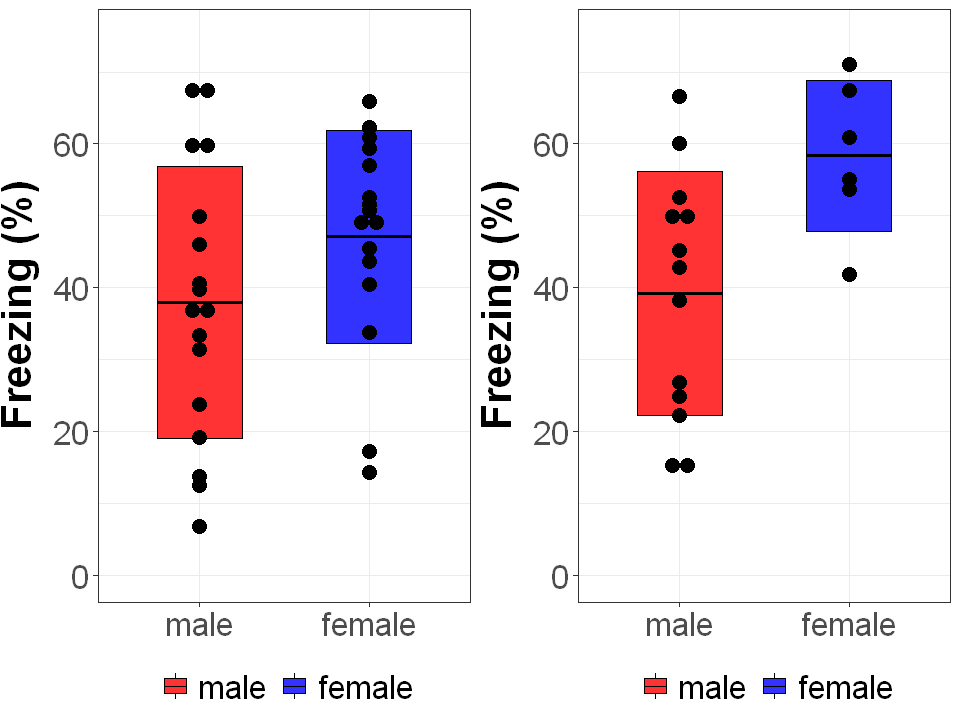

In [14]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.7
    dp_dotsize=3
    
    # y limits
    ylim1 = 0
    ylim2 = 75

#     ylim1 = -2
#     ylim2 = 90
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################


out2_1 = box_plot(df.set1, "sex","fz_ave", "stress", "no_stress","Freezing (%)")
out2_2 = box_plot(df.set1, "sex","fz_ave", "stress", "stress","Freezing (%)")

# plot the two plots
# set the size of final plot, width x height
plot_width = 8
plot_height = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out2_1, out2_2, ncol=2)

**Export the plot as an eps file**

In [61]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**
    
    Need to set "var.equal = TRUE" in t.test
- **t-tests**
    https://www.statmethods.net/stats/ttest.html

In [29]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b, var.equal = TRUE)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)
    
    return(temp.test)
}

for (sex1 in c("male", "female")){
    for (sex2 in c("male", "female")){
        for (stress1 in c("stress","no_stress")){
            for (stress2 in c("stress","no_stress")){
                temp = two_sample_t_test(df.set1, "fz_ave","sex",sex1,"stress",stress1,"sex",sex2,"stress",stress2)
}}}}


### (male, 	stress) 	vs. (male, 	stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.8549776 
### (male, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.8549776 
### (male, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  1 
### (male, 	stress) 	vs. (female, 	stress) 	###	p-value:  0.0009730087 
### (male, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.1926338 
### (male, 	no_stress) 	vs. (female, 	stress) 	###	p-value:  0.0007638191 
### (male, 	no_stress) 	vs. (female, 	no_stress) 	###	p-value:  0.1357369 
### (female, 	stress) 	vs. (male, 	stress) 	###	p-value:  0.0009730087 
### (female, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.0007638191 
### (female, 	no_stress) 	vs. (male, 	stress) 	###	p-value:  0.1926338 
### (female, 	no_stress) 	vs. (male, 	no_stress) 	###	p-value:  0.1357369 
### (female, 	stress) 	vs. (female, 	stress) 	###	p-value:  1 
### (female, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.005363606 
### (fema

---
**Examine the output from 2-sample t-test**<BR>
The class of output is 'htest', and complecated!

In [12]:
# temp is the output from the previous cell
# print out the test
temp
# list variable names in the temp
names(temp)
# print lass of the temp output
class(temp)
# stracture of the temp output
str(temp)
# summary of variables of the temp output
summary(temp)


	Welch Two Sample t-test

data:  temp.a and temp.b
t = 0, df = 62, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.758504  8.758504
sample estimates:
mean of x mean of y 
 47.08984  47.08984 


[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

[1] "htest"

List of 10
 $ statistic  : Named num 0
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 62
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1
 $ conf.int   : num [1:2] -8.76 8.76
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 47.1 47.1
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 4.38
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "temp.a and temp.b"
 - attr(*, "class")= chr "htest"


            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    2      -none- numeric  
null.value  1      -none- numeric  
stderr      1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

**Naking the output**<BR>
    Output is a list of multiple lists

In [13]:
# Show the content of parameter
temp['parameter']
temp[2]

# Extract the inside list
temp[['parameter']]
temp[[2]]
temp$parameter

# Show the content of "df" value in the inside list
temp[['parameter']]['df']
temp[[2]][1]

# Extract value from the 
temp[['parameter']][['df']]
temp[[2]][[1]]

$parameter
df 
62

$parameter
df 
62

df 
62

df 
62

df 
62

df 
62

df 
62

[1] 62

[1] 62

**You can even add new value**

In [14]:
temp[['parameter']]['df1'] = 1

---
## Summary graphs

Warning message:
"Removed 4 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 4 rows containing non-finite values (stat_bindot)."
Warning message:
"Removed 3 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 3 rows containing non-finite values (stat_bindot)."


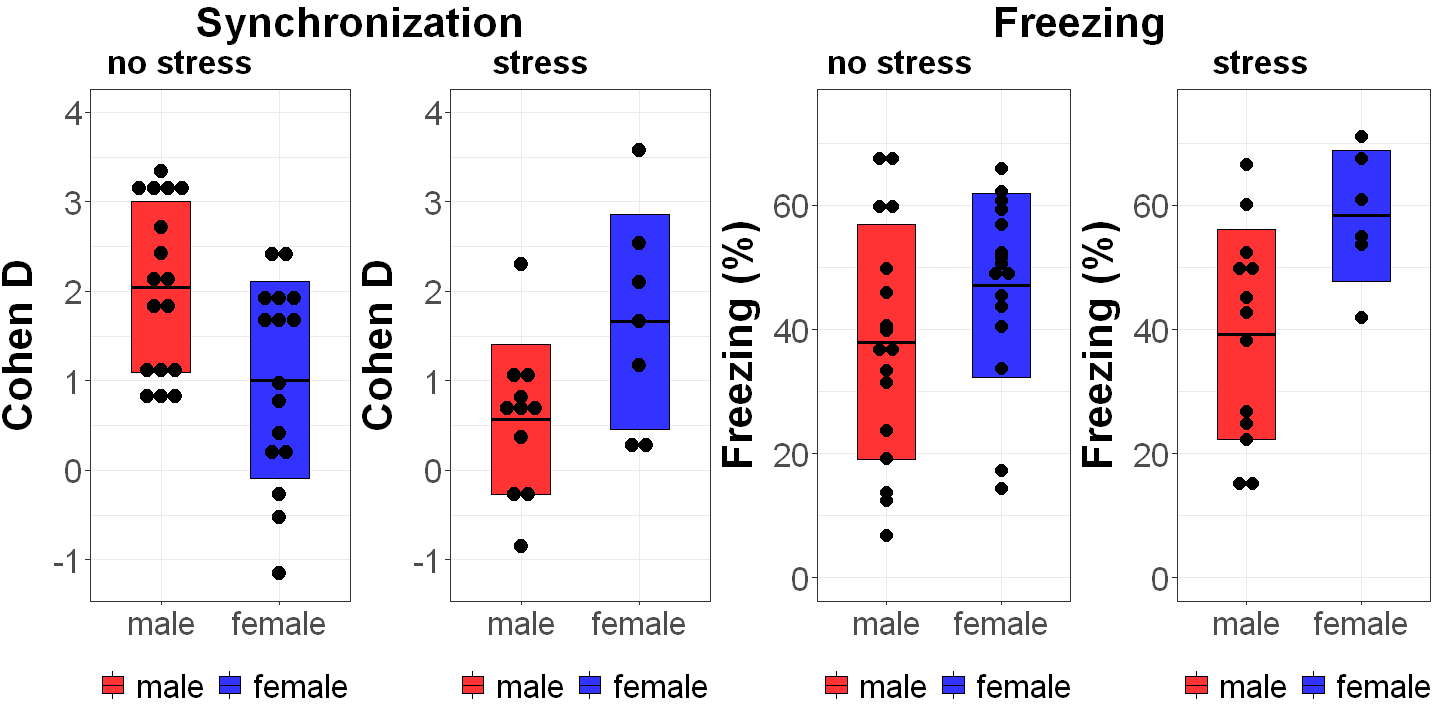

In [28]:
# set the size of final plot
plot_height = 6
plot_width = 12
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

out1_1a = annotate_figure(out1_1,top = text_grob("no stress", face = "bold", size = 20))
out1_2a = annotate_figure(out1_2,top = text_grob("stress", face = "bold", size = 20))
out2_1a = annotate_figure(out2_1,top = text_grob("no stress", face = "bold", size = 20))
out2_2a = annotate_figure(out2_2,top = text_grob("stress", face = "bold", size = 20))

b1 = ggarrange(out1_1a, out1_2a, ncol=2)
b1 = annotate_figure(b1,top = text_grob("Synchronization", face = "bold", size = 25))
b2 = ggarrange(out2_1a, out2_2a, ncol=2)
b2 = annotate_figure(b2,top = text_grob("Freezing", face = "bold", size = 25))

ggarrange(b1, b2, ncol=2)

**Export the plot as an eps file**

In [ ]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**Two-way ANOVA test**

In [66]:
temp.aov = aov(cohen_d ~ fz_ave*stress*sex, data = df.set1)
summary(temp.aov)


                  Df Sum Sq Mean Sq F value  Pr(>F)   
fz_ave             1   6.23   6.227   4.227 0.04514 * 
stress             1   3.85   3.845   2.610 0.11262   
sex                1   0.05   0.048   0.033 0.85738   
fz_ave:stress      1   3.40   3.399   2.307 0.13519   
fz_ave:sex         1   9.64   9.642   6.545 0.01366 * 
stress:sex         1  12.72  12.724   8.636 0.00501 **
fz_ave:stress:sex  1   0.00   0.002   0.001 0.97302   
Residuals         49  72.19   1.473                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---
## Step 5. Correlation between freezing levels and synchronization
**plot the scatter plot**

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



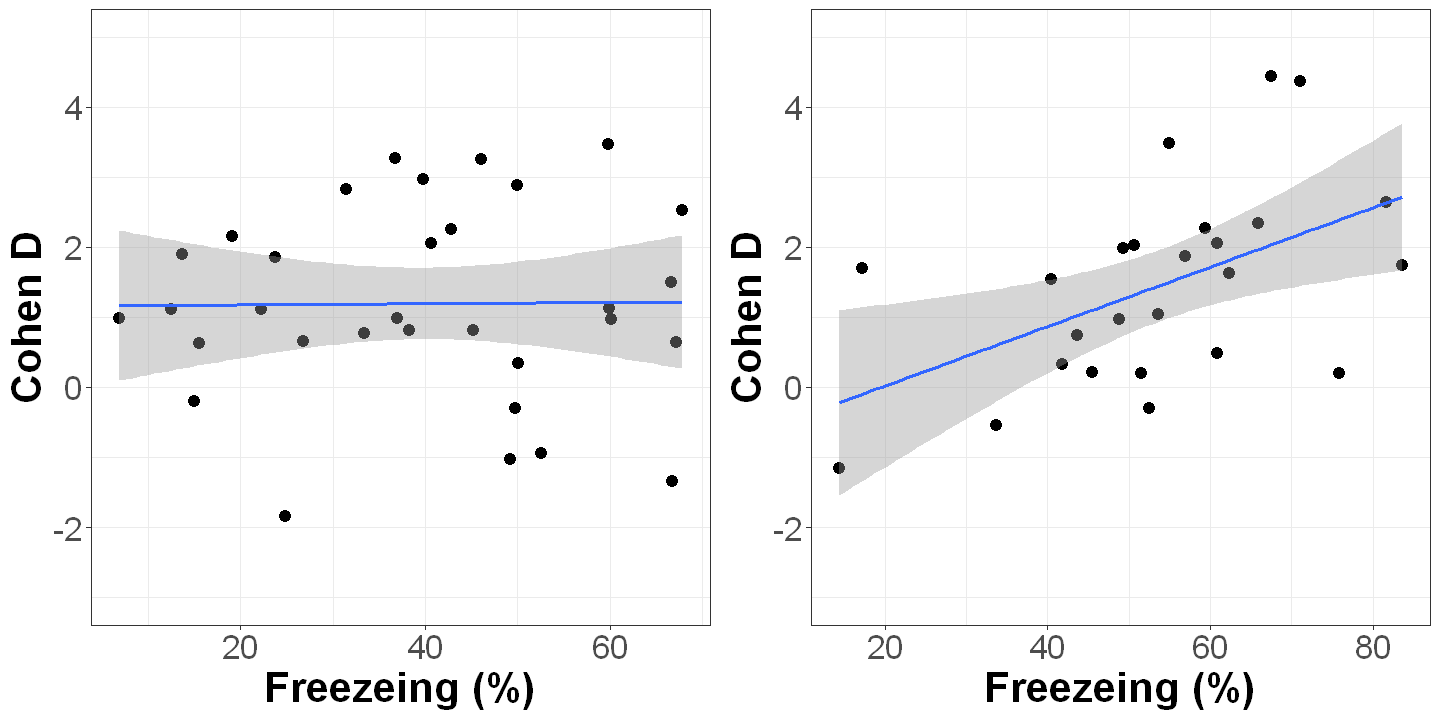

In [68]:
###################################################################################################
# Function scatter_plot
###################################################################################################
scatter_plot <- function(df.input, x1_col, y_col, split_col, select_col, select_value, xaxis_label, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    plot_width = 8
    plot_height = 6

    # dotplot
#     dp_binwidth=0.7
#     dp_dotsize=3
   
    point_size = 3
        
    # y limits
    ylim1 = -3
    ylim2 = 5
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    select <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]

    # set the size of final plot
    options(repr.plot.width=plot_width, repr.plot.height=plot_height)
    
    
    if (split_col !=''){
        split <- names(df.input)[which (colnames(df.input)==split_col)]
        plot_temp = ggplot(df.input[df.input[,select]==select_value,], aes_string(x=x1,y=y,fill=split,color=split))
    } else {
        plot_temp = ggplot(df.input[df.input[,select]==select_value,], aes_string(x=x1,y=y))
    }

        plot_temp + geom_point(size=point_size)+
        geom_point(size=point_size,shape=1,colour="black")+
        geom_smooth(method=lm)+

        # x axis label
        labs(x=xaxis_label)+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        scale_colour_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            # axis.title.x = element_blank(),
            axis.title = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))

}

limit_df <- function(df.input, lim_col, lim_value){
    
    lim_col <- names(df.input)[which (colnames(df.input)==lim_col)]
    
    df.temp = df.input[df.input[,lim_col]==lim_value,]
    return(df.temp)
}

###################################################################################################
# START HERE
###################################################################################################
# lim_col = 'sex'
# lim_value = 'male'
# df.input = df.set1
# df.temp = limit_df(df.input)

# plot male
df.input = df.set1               # data frame
x_col = 'fz_ave'                 # x-axis values
y_col = 'cohen_d'                # y-axis values
split_col = ''
#split_col = 'stress'             # The column to split graph 
select_col = "sex"
select_value = "male"            # limit records with male in the sex column
xaxis_label = "Freezeing (%)"    # x-asix label
yaxis_label = "Cohen D"          # y-asix label

out3_1 = scatter_plot(df.input,x_col,y_col,split_col,select_col,select_value,xaxis_label,yaxis_label)


# plot female
select_value = "female"          # limit records with female in the sex column
out3_2 = scatter_plot(df.input,x_col,y_col,split_col,select_col,select_value,xaxis_label,yaxis_label)


# plot both
plot_height = 6
plot_width = 12
# set the size of final plot
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
ggarrange(out3_1, out3_2, ncol=2)

In [69]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



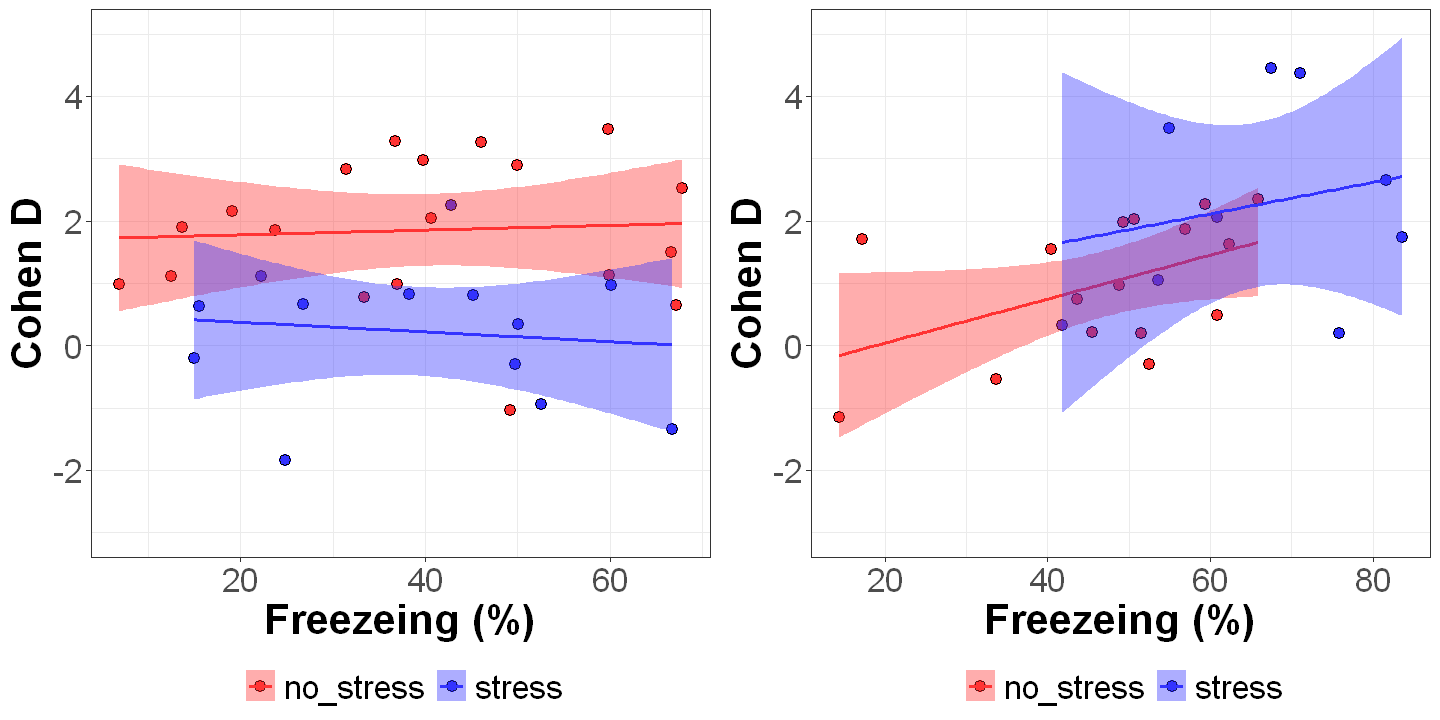

In [70]:
###################################################################################################
# Function scatter_plot
###################################################################################################
scatter_plot <- function(df.input, x1_col, y_col, split_col, select_col, select_value, xaxis_label, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    plot_width = 8
    plot_height = 6

    # dotplot
#     dp_binwidth=0.7
#     dp_dotsize=3
   
    point_size = 3
        
    # y limits
    ylim1 = -3
    ylim2 = 5
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    select <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]

    # set the size of final plot
    options(repr.plot.width=plot_width, repr.plot.height=plot_height)
    
    
    if (split_col !=''){
        split <- names(df.input)[which (colnames(df.input)==split_col)]
        plot_temp = ggplot(df.input[df.input[,select]==select_value,], aes_string(x=x1,y=y,fill=split,color=split))
    } else {
        plot_temp = ggplot(df.input[df.input[,select]==select_value,], aes_string(x=x1,y=y))
    }

        plot_temp + geom_point(size=point_size)+
        geom_point(size=point_size,shape=1,colour="black")+
        geom_smooth(method=lm)+

        # x axis label
        labs(x=xaxis_label)+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        scale_colour_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            # axis.title.x = element_blank(),
            axis.title = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))

}

limit_df <- function(df.input, lim_col, lim_value){
    
    lim_col <- names(df.input)[which (colnames(df.input)==lim_col)]
    
    df.temp = df.input[df.input[,lim_col]==lim_value,]
    return(df.temp)
}

###################################################################################################
# START HERE
###################################################################################################
# lim_col = 'sex'
# lim_value = 'male'
# df.input = df.set1
# df.temp = limit_df(df.input)

# plot male
df.input = df.set1               # data frame
x_col = 'fz_ave'                 # x-axis values
y_col = 'cohen_d'                # y-axis values
# split_col = ''
split_col = 'stress'             # The column to split graph 
select_col = "sex"
select_value = "male"            # limit records with male in the sex column
xaxis_label = "Freezeing (%)"    # x-asix label
yaxis_label = "Cohen D"          # y-asix label

out3_1 = scatter_plot(df.input,x_col,y_col,split_col,select_col,select_value,xaxis_label,yaxis_label)


# plot female
select_value = "female"          # limit records with female in the sex column
out3_2 = scatter_plot(df.input,x_col,y_col,split_col,select_col,select_value,xaxis_label,yaxis_label)


# plot both
plot_height = 6
plot_width = 12
# set the size of final plot
options(repr.plot.width=plot_width, repr.plot.height=plot_height)
ggarrange(out3_1, out3_2, ncol=2)

**Export the plot as an eps file**

In [71]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**Linear Regression**<BR>
http://r-statistics.co/Linear-Regression.html

- **Correlation:**
Correlation is a statistical measure that suggests the level of linear dependence between two variables, that occur in pair – just like what we have here in speed and dist. Correlation can take values between -1 to +1. If we observe for every instance where speed increases, the distance also increases along with it, then there is a high positive correlation between them and therefore the correlation between them will be closer to 1. The opposite is true for an inverse relationship, in which case, the correlation between the variables will be close to -1.

A value closer to 0 suggests a weak relationship between the variables. **A low correlation (-0.2 < x < 0.2)** probably suggests that much of variation of the response variable (Y) is unexplained by the predictor (X), in which case, we should probably look for better explanatory variables.

- **The linear correlation coefficient (Pearson’s r)** is just the standardized slope of a simple linear regression line.<BR>
    https://sebastianraschka.com/faq/docs/pearson-r-vs-linear-regr.html
    

**Test the entire data**

In [40]:
# Less correlation in the entirly collapsed data set

# calculate correlation between freeze and cohen_d
cat("Correlation: ",cor(df.set1$fz_ave, df.set1$cohen_d),"\n")

# Modeling the linear model
temp.linearmod = lm(cohen_d ~ fz_ave, data=df.set1)

# Details
temp.summary = summary(temp.linearmod)
print(temp.summary)

Correlation:  0.2400332 

Call:
lm(formula = cohen_d ~ fz_ave, data = df.set1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0200 -0.9600 -0.1430  0.8347  2.7491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.490019   0.480448   1.020   0.3122  
fz_ave      0.017795   0.009704   1.834   0.0721 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.361 on 55 degrees of freedom
Multiple R-squared:  0.05762,	Adjusted R-squared:  0.04048 
F-statistic: 3.363 on 1 and 55 DF,  p-value: 0.0721



**It looks like the following perason command is the digest version**

In [41]:
cor.test(df.set1$fz_ave, df.set1$cohen_d, method = 'pearson')


	Pearson's product-moment correlation

data:  df.set1$fz_ave and df.set1$cohen_d
t = 1.8337, df = 55, p-value = 0.0721
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02190452  0.47113381
sample estimates:
      cor 
0.2400332 


**Test each group**
- R Tip: How to Pass a formula to lm**<BR>
http://www.win-vector.com/blog/2018/09/r-tip-how-to-pass-a-formula-to-lm/

In [57]:
# Effects of sex and stress on the correlation

comp_cor <- function(df.input, pred_col, resp_col, lim1_col, lim1_value, lim2_col, lim2_value){
    
    # get column name
    pred_col <- names(df.input)[which (colnames(df.input)==pred_col)]
    resp_col <- names(df.input)[which (colnames(df.input)==resp_col)]
    lim1_col <- names(df.input)[which (colnames(df.input)==lim1_col)]  

    # Extract data frame
    if (lim2_col !=''){
            lim2_col <- names(df.input)[which (colnames(df.input)==lim2_col)]
            temp = df.input[df.input[,lim1_col]==lim1_value & df.input[,lim2_col]==lim2_value,]  
    } else {
            temp = df.input[df.input[,lim1_col]==lim1_value,]   
    }
       
    # compute correlations
    temp.cor = cor(temp[,pred_col], temp[,resp_col])
    
    # estimate the linear model
    # create formula to fit
    f = paste(resp_col, pred_col, sep = " ~ ")
    #cat("formula: ", f, ", ")
    
    # create model based on the created formula
    temp.linearmod = lm(f, data=temp)
    temp.summary = summary(temp.linearmod)
    
    # output in brief
    cat(paste0('### (',lim1_value,", ",lim2_value, ") ###, "))
    cat("correlation: ", temp.cor, ", ")
    cat("intercept_p-value: ", temp.summary[['coefficients']]['(Intercept)','Pr(>|t|)'], ", ")
    cat("freeze_p-value: ", temp.summary[['coefficients']]['fz_ave','Pr(>|t|)'], "\n")

    # output full
#     cat("correlation: ", temp.cor, "\n")
#     cat("formula: ", f, "\n")
#     print(temp.summary)
    
    temp.list = list("cor"=temp.cor, "f"=f, "linearmod"=temp.linearmod, "summary"=temp.summary)
    return(temp.list)
}
    
for (sex1 in c("male", "female")){
    for (stress1 in c("stress","no_stress")){
        df.input = df.set1
        pred_col = 'fz_ave'
        resp_col = 'cohen_d'
        lim1_col = 'sex'
        lim1_value = sex1
        lim2_col ='stress'
        lim2_value = stress1
        temp = comp_cor(df.input, pred_col,resp_col,lim1_col,lim1_value,lim2_col,lim2_value)
}}

for (sex1 in c("male", "female")){
        df.input = df.set1
        pred_col = 'fz_ave'
        resp_col = 'cohen_d'
        lim1_col = 'sex'
        lim1_value = sex1
        lim2_col =''
        lim2_value = ''
        temp = comp_cor(df.input, pred_col,resp_col,lim1_col,lim1_value,lim2_col,lim2_value)
}


### (male, stress) ###, correlation:  -0.1176589 , intercept_p-value:  0.5393035 , freeze_p-value:  0.7018575 

Call:
lm(formula = f, data = temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1862 -0.6198  0.2106  0.6241  2.0564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.533712   0.842372   0.634    0.539
fz_ave      -0.007797   0.019842  -0.393    0.702

Residual standard error: 1.164 on 11 degrees of freedom
Multiple R-squared:  0.01384,	Adjusted R-squared:  -0.07581 
F-statistic: 0.1544 on 1 and 11 DF,  p-value: 0.7019

### (male, no_stress) ###, correlation:  0.06232801 , intercept_p-value:  0.01747494 , freeze_p-value:  0.7998948 

Call:
lm(formula = f, data = temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9232 -0.7754  0.1449  1.0004  1.5441 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.703883   0.647324   2.632   0.0175 *
fz_ave      0.003771   0.014646   0.257   0.7999  
---
Signi

---
## Step 6. Sex effects on fear buffering and freezing equalization
**Load R dataframe**

In [2]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  216 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lag

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Extract together and alone records**<BR>

In [3]:
df.set1 <- subset(df, 
                  #single_animal==FALSE & 
                  is.na(infusion_hpc) &
                  is.na(infusion_pfc) & 
                  #familiarity=='familiar' &
                  lighting =='visible' &
                  !is.na(together_alone_id) &
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

# Output data frame as well as Excel file (not included columns of list)
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data_set1"
save_files(df.input,path,base)

dimension:  93 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Create new data frame with four columns**<BR>
    together_alone, animal_id, sex, freeze

In [4]:
# Create data frame
df.together_alone = data.frame(
    animal_id=character(),
    sex=character(),
    together_alone=character(),
    pair_id=character(),
    familiarity=character(),
    freeze_dif=character(),
    freeze=double())

for (pair_id in unique(df.set1[,'together_alone_id'])){

    # pair_id = '20190408_testing_2_m7ab'

    # Extract relevant records
    df.together = df.set1[df.set1[,'together_alone_id']==pair_id & df.set1[,'together_alone_role']=='together',]
    df.sub1 = df.set1[df.set1[,'together_alone_id']==pair_id & df.set1[,'together_alone_role']=='sub1',]
    df.sub2 = df.set1[df.set1[,'together_alone_id']==pair_id & df.set1[,'together_alone_role']=='sub2',]

    # Create two records for sub1
    df.together_alone = df.together_alone %>% add_row(
        'pair_id' = pair_id,
        'familiarity' = df.together[,'familiarity'],
        'together_alone' = 'together',
        'animal_id' = df.sub1[,'folder_videoname'],
        'sex' = df.sub1[,'sex'],
        'freeze_dif' = 'FALSE',
        'freeze' = df.together[,'fz_sub1']
        )
    
    df.together_alone = df.together_alone %>% add_row(
        'pair_id' = pair_id,
        'familiarity' = df.together[,'familiarity'],
        'together_alone' = 'alone',
        'animal_id' = df.sub1[,'folder_videoname'],
        'sex' = df.sub1[,'sex'],
        'freeze_dif' = 'FALSE',
        'freeze' = df.sub1[,'fz_sub1']
        )

    # Create two records for sub2
    df.together_alone = df.together_alone %>% add_row(
        'pair_id' = pair_id,
        'familiarity' = df.together[,'familiarity'],
        'together_alone' = 'together',
        'animal_id' = df.sub2[,'folder_videoname'],
        'sex' = df.sub2[,'sex'],
        'freeze_dif' = 'FALSE',
        'freeze' = df.together[,'fz_sub2']
        )
        
    df.together_alone = df.together_alone %>% add_row(
        'pair_id' = pair_id,
        'familiarity' = df.together[,'familiarity'],
        'together_alone' = 'alone',
        'animal_id' = df.sub2[,'folder_videoname'],
        'sex' = df.sub2[,'sex'],
        'freeze_dif' = 'FALSE',
        'freeze' = df.sub2[,'fz_sub1']
        )
    
    # Create two records for difference of freezing either alone or together
    df.together_alone = df.together_alone %>% add_row(
        'pair_id' = pair_id,
        'familiarity' = df.together[,'familiarity'],
        'together_alone' = 'together',
        'animal_id' = pair_id,
        'sex' = df.sub2[,'sex'],
        'freeze_dif' = 'TRUE',
        'freeze' = abs(df.together[,'fz_sub1'] - df.together[,'fz_sub2'])
        )
        
    df.together_alone = df.together_alone %>% add_row(
        'pair_id' = pair_id,
        'familiarity' = df.together[,'familiarity'],
        'together_alone' = 'alone',
        'animal_id' = pair_id,
        'sex' = df.sub2[,'sex'],
        'freeze_dif' = 'TRUE',
        'freeze' = abs(df.sub1[,'fz_sub1'] - df.sub2[,'fz_sub1'])
        )
    
    

}

#######################################
# Display summary
dis_summary(df.set1)

# Output data frame as well as Excel file (not included columns of list)
df.input = df.set2
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data_set1"
save_files(df.input,path,base)

**plot**

dimension:  52 7 
     animal_id            sex together_alone        pair_id    familiarity 
   "character"    "character"    "character"    "character"    "character" 
    freeze_dif         freeze 
   "character"      "numeric" 


,animal_id,sex,together_alone,pair_id,familiarity,freeze_dif,freeze
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,20190408_testing_1_7a,male,together,20190408_testing_2_m7ab,familiar,FALSE,22.29167
2,20190408_testing_1_7a,male,alone,20190408_testing_2_m7ab,familiar,FALSE,33.75000


dimension:  48 7 
     animal_id            sex together_alone        pair_id    familiarity 
   "character"    "character"    "character"    "character"    "character" 
    freeze_dif         freeze 
   "character"      "numeric" 


,animal_id,sex,together_alone,pair_id,familiarity,freeze_dif,freeze
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
13,20190408_testing_2_f10a,female,together,20190408_testing_1_f10ab,familiar,FALSE,31.04167
14,20190408_testing_2_f10a,female,alone,20190408_testing_1_f10ab,familiar,FALSE,45.83333


dimension:  24 7 
     animal_id            sex together_alone        pair_id    familiarity 
   "character"    "character"    "character"    "character"    "character" 
    freeze_dif         freeze 
   "character"      "numeric" 


,animal_id,sex,together_alone,pair_id,familiarity,freeze_dif,freeze
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
151,20190809_afternoon_26a,female,together,20190809_morning_26a29b,unfamiliar,FALSE,30.83333
152,20190809_afternoon_26a,female,alone,20190809_morning_26a29b,unfamiliar,FALSE,50.20833


dimension:  26 7 
     animal_id            sex together_alone        pair_id    familiarity 
   "character"    "character"    "character"    "character"    "character" 
    freeze_dif         freeze 
   "character"      "numeric" 


,animal_id,sex,together_alone,pair_id,familiarity,freeze_dif,freeze
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
5,20190408_testing_2_m7ab,male,together,20190408_testing_2_m7ab,familiar,TRUE,28.95833
6,20190408_testing_2_m7ab,male,alone,20190408_testing_2_m7ab,familiar,TRUE,49.16667


dimension:  24 7 
     animal_id            sex together_alone        pair_id    familiarity 
   "character"    "character"    "character"    "character"    "character" 
    freeze_dif         freeze 
   "character"      "numeric" 


,animal_id,sex,together_alone,pair_id,familiarity,freeze_dif,freeze
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
17,20190408_testing_1_f10ab,female,together,20190408_testing_1_f10ab,familiar,TRUE,25.20833
18,20190408_testing_1_f10ab,female,alone,20190408_testing_1_f10ab,familiar,TRUE,16.45833


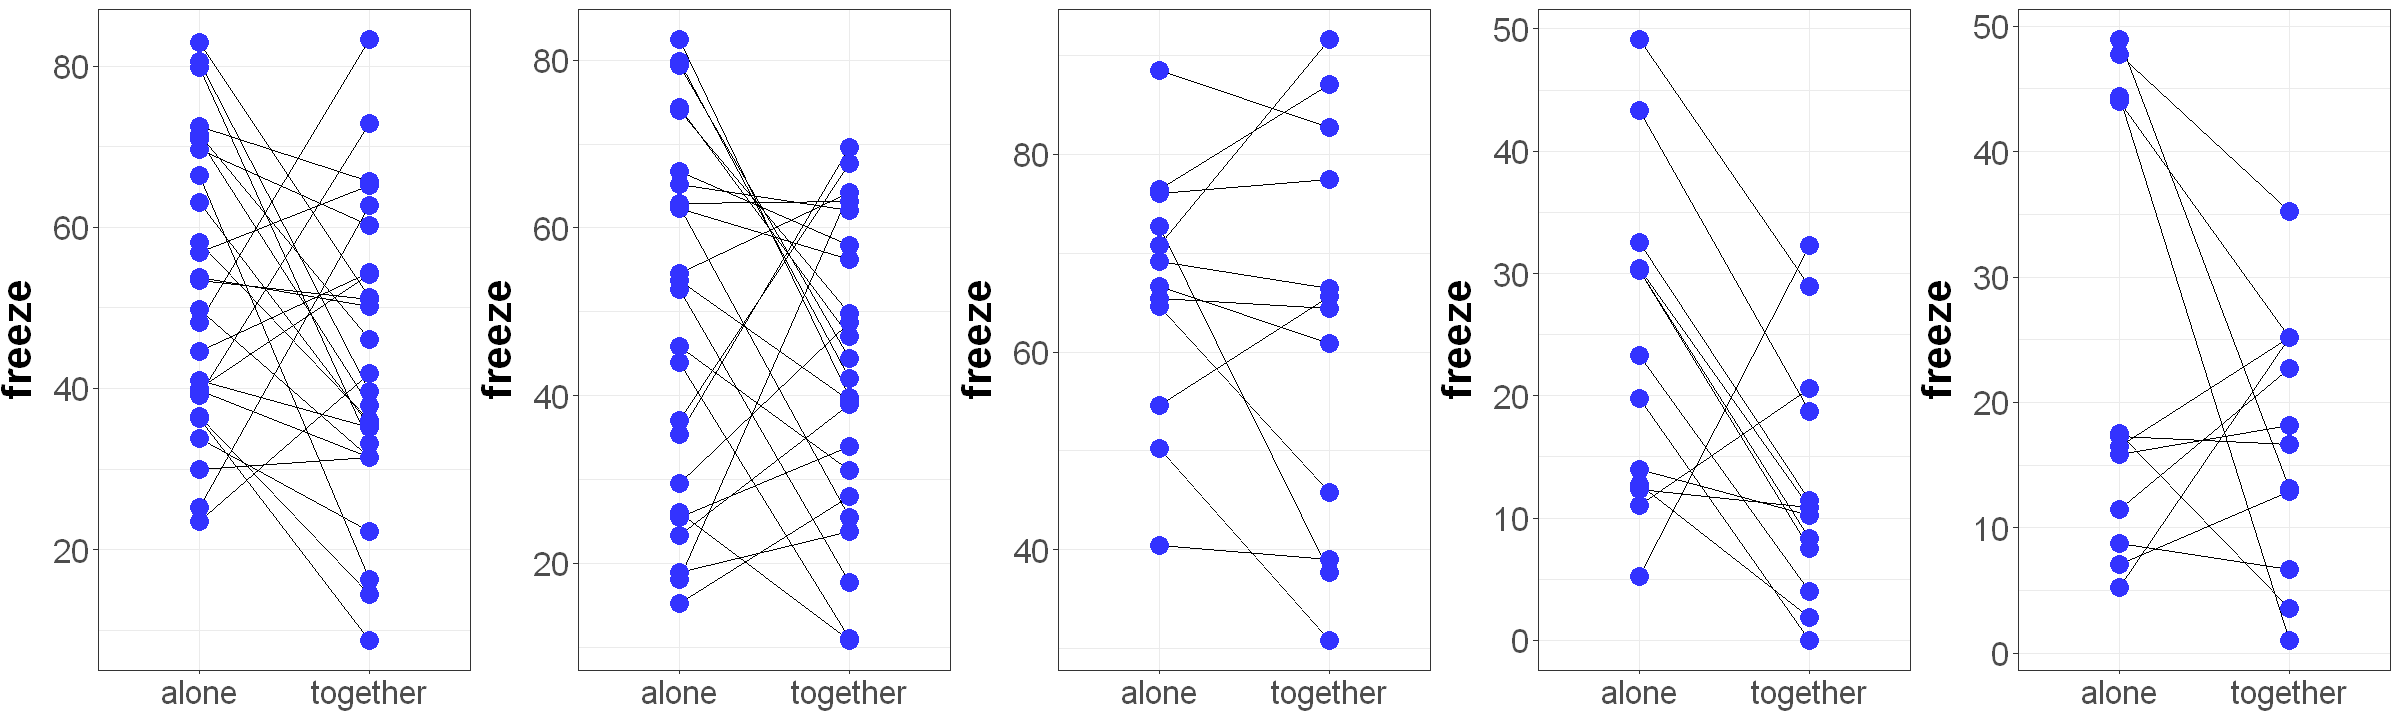

In [7]:
paired_plot <- function(df.input){
dp_dotsize=5

# p<- ggplot(df.temp, aes(x=together_alone, y=freeze, group=animal_id, color=animal_id)) + 
ggp.output<- ggplot(df.input, aes(x=together_alone, y=freeze, group=animal_id))+ 
        geom_line()+
        geom_point(size=dp_dotsize, colour="#3333FF")+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            #legend.position = 'bottom',
            #legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=10))

return(ggp.output)
}

df.temp = df.together_alone[df.together_alone[,'sex']=='male' & df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='FALSE',]
# Display summary
dis_summary(df.temp)
out3_1 = paired_plot(df.temp)

df.temp = df.together_alone[df.together_alone[,'sex']=='female'& df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='FALSE',]
# Display summary
dis_summary(df.temp)
out3_2 = paired_plot(df.temp)

df.temp = df.together_alone[df.together_alone[,'sex']=='female'& df.together_alone[,'familiarity']=='unfamiliar' &
                            df.together_alone[,'freeze_dif']=='FALSE',]
# Display summary
dis_summary(df.temp)
out3_3 = paired_plot(df.temp)

df.temp = df.together_alone[df.together_alone[,'sex']=='male' & df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='TRUE',]
# Display summary
dis_summary(df.temp)
out3_4 = paired_plot(df.temp)

df.temp = df.together_alone[df.together_alone[,'sex']=='female' & df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='TRUE',]
# Display summary
dis_summary(df.temp)
out3_5 = paired_plot(df.temp)


# plot the two plots
# set the size of final plot, width x height
plot_width = 20
plot_height = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out3_1, out3_2, out3_3, out3_4, out3_5, ncol=5)

In [8]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**Paired Samples T-test**
- **Paired Samples T-test**
http://www.sthda.com/english/wiki/paired-samples-t-test-in-r

In [7]:
df.input = df.together_alone[df.together_alone[,'sex']=='male' & df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='FALSE',]

xa1 = 'together_alone'
xa1_value = 'together'
xb1 = 'together_alone'
xb1_value = 'alone'
y = 'freeze'

# Extract data frame to vectors
    temp.a = df.input[,y][df.input[,xa1]==xa1_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value]


res <- t.test(temp.a, temp.b, paired = TRUE)
res


	Paired t-test

data:  temp.a and temp.b
t = -1.8984, df = 25, p-value = 0.06924
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.8272002   0.7663027
sample estimates:
mean of the differences 
              -9.030449 


In [8]:
df.input = df.together_alone[df.together_alone[,'sex']=='female'& df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='FALSE',]

xa1 = 'together_alone'
xa1_value = 'together'
xb1 = 'together_alone'
xb1_value = 'alone'
y = 'freeze'

# Extract data frame to vectors
    temp.a = df.input[,y][df.input[,xa1]==xa1_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value]


res <- t.test(temp.a, temp.b, paired = TRUE)
res


	Paired t-test

data:  temp.a and temp.b
t = -1.2424, df = 23, p-value = 0.2266
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.956901   4.231207
sample estimates:
mean of the differences 
              -6.362847 


In [9]:
df.input = df.together_alone[df.together_alone[,'sex']=='male' & df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='TRUE',]

xa1 = 'together_alone'
xa1_value = 'together'
xb1 = 'together_alone'
xb1_value = 'alone'
y = 'freeze'

# Extract data frame to vectors
    temp.a = df.input[,y][df.input[,xa1]==xa1_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value]


res <- t.test(temp.a, temp.b, paired = TRUE)
res


	Paired t-test

data:  temp.a and temp.b
t = -2.6677, df = 12, p-value = 0.0205
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20.758465  -2.094099
sample estimates:
mean of the differences 
              -11.42628 


In [10]:
df.input = df.together_alone[df.together_alone[,'sex']=='female' & df.together_alone[,'familiarity']=='familiar' &
                            df.together_alone[,'freeze_dif']=='TRUE',]

xa1 = 'together_alone'
xa1_value = 'together'
xb1 = 'together_alone'
xb1_value = 'alone'
y = 'freeze'

# Extract data frame to vectors
    temp.a = df.input[,y][df.input[,xa1]==xa1_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value]


res <- t.test(temp.a, temp.b, paired = TRUE)
res


	Paired t-test

data:  temp.a and temp.b
t = -1.1965, df = 11, p-value = 0.2567
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.683845   5.524123
sample estimates:
mean of the differences 
              -6.579861 


---
## Step 7. Local infusion of muscimol into PFC and vHippo
**Load R dataframe**

In [2]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  216 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lag

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Exclude single animal, lighting and partition experiments**<BR>
It's good to check using the data frame viewer in RStudio.

In [3]:
df.set1 <- subset(df, 
                  single_animal==FALSE & 
                  ( !is.na(infusion_hpc) |
                  !is.na(infusion_pfc) )& 
                  familiarity=='familiar' &
                  lighting =='visible' & 
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

# Output as Excel file, not included with list
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data_set1"
save_files(df.input,path,base)

dimension:  33 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
104,20190902_m27,FALSE,male,90,NA,muscimole,familiar,visible,FALSE,no_stress,...,22.91667,3.0031131,"241, 251, 265, 276, 302, 311, 318, 326, 332, 359, 371, 379, 388, 406, 448, 467, 473, 482, 509, 517, 538, 544, 616, 622","249, 264, 273, 290, 308, 315, 323, 330, 341, 364, 376, 386, 401, 413, 453, 471, 480, 485, 516, 524, 542, 548, 620, 630","243, 284, 302, 326, 359, 369, 382, 391, 397, 408, 420, 436, 444, 455, 466, 476, 488, 520, 607, 626, 681","264, 290, 312, 337, 367, 376, 389, 395, 406, 413, 429, 441, 453, 459, 471, 481, 492, 525, 614, 635, 685","2, -8, 19, 8, 0, -9, 8, 0, -6, 0, -2, 3, 3, 2, -4, -1, 3, -6, 11, 3, -18, -24, -9, 4","-2, -8, 0, 0, 0, 2, -3, -3, -9, -2, -14, 12, 4, -7, 1, -3, -6, -3, 9, -4, -59","15, 0, -9, 0, 4, -3, -11, 7, -4, 3, 0, 3, 5, 0, 0, 0, 1, -4, 9, 1, -17, -23, -6, 5","0, 0, 3, 4, -3, 0, -3, 6, -5, 0, -16, 12, 0, -6, 0, -1, -7, -1, 6, -5, -55"
105,20190902_m28,FALSE,male,90,NA,muscimole,familiar,visible,FALSE,no_stress,...,25.83333,0.9591759,"261, 272, 305, 318, 332, 370, 383, 418, 438, 452, 494, 504, 511, 519, 535, 560, 578, 597, 604, 640, 685, 700, 706","265, 292, 310, 324, 336, 375, 387, 423, 445, 456, 501, 509, 515, 525, 539, 571, 583, 601, 610, 662, 695, 704, 714","243, 306, 316, 333, 343, 363, 368, 377, 390, 398, 409, 434, 448, 464, 493, 511, 518, 526, 551, 558, 564, 572, 611, 685, 700","283, 311, 331, 340, 362, 367, 376, 388, 396, 402, 431, 441, 456, 490, 509, 515, 524, 539, 555, 562, 571, 577, 619, 694, 715","-18, -29, 1, -2, 1, -2, -6, -9, -4, -4, -1, 7, 0, -1, -9, -2, -6, 14, 7, -29, 0, 0, -6","18, -1, 2, -1, -11, 7, 2, 6, -7, -15, 9, 4, 4, -12, 1, 0, 1, -7, 9, 2, -4, 6, -7, 0, 0","18, -9, 1, 7, 4, 1, 1, 8, -4, 0, 8, 0, 0, -1, 0, 0, -6, 18, 9, 32, -1, -10, 1","9, -1, 5, -4, 13, 8, -1, -1, -9, -15, -8, 4, 0, 11, 0, 0, 1, 0, -16, 9, 0, -6, -9, 1, -1"


**Plot Cohen D for local infusion of muscimol at either PFC or vHippo**

stress : no_stress , infusion_pfc : muscimole , min: 0.9591759 , mean: 2.146596 , max: 3.003113 , n: 8 , sd: 0.7065978 
stress : no_stress , infusion_pfc : vehicle , min: -0.1362837 , mean: 2.268668 , max: 4.863692 , n: 9 , sd: 1.663828 
stress : no_stress , infusion_hpc : vehicle , min: 0.1745928 , mean: 1.627953 , max: 2.572759 , n: 8 , sd: 0.7730048 
stress : no_stress , infusion_hpc : muscimole , min: -1.087307 , mean: 0.2118223 , max: 1.11434 , n: 8 , sd: 0.958489 


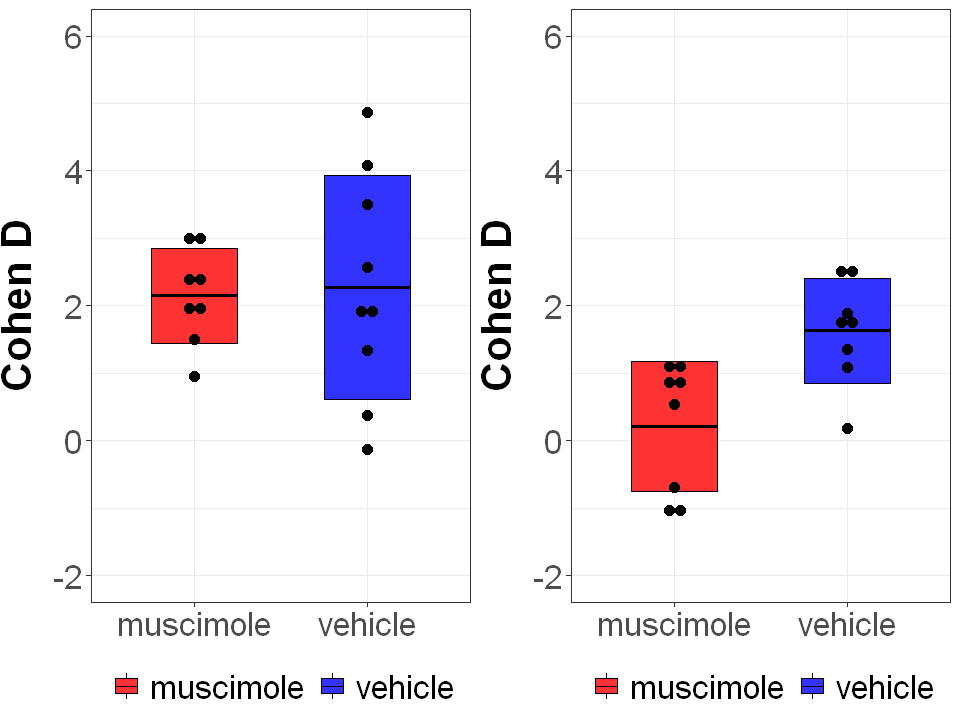

In [22]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.2
    dp_dotsize=0.8
    
    # y limits
#     ylim1 = -1.2
#     ylim2 = 4.0
    
    ylim1 = -2.0
    ylim2 = 6.0

    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################
# plot PFC infusion
df.input = subset(df.set1, !is.na(infusion_pfc))
x_col = "infusion_pfc"            # x-axis is sex
y_col = "cohen_d"        # y-axis is cohen_d
select_col = "stress"
select_value = "no_stress"  # limit records with stress in the stress column
y_axis_label = "Cohen D" # y-asix label

out1_1 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot vHippo infusion
df.input = subset(df.set1, !is.na(infusion_hpc))
x_col = "infusion_hpc"            # x-axis is sex

out1_2 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot the two plots together
# set the size of final plot, width x height
plot_width = 8
plot_height= 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out1_1, out1_2, ncol=2)



**Export the plot as an eps file**

In [23]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [10]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)

    return(temp.test)
}

df.input = subset(df.set1, !is.na(infusion_pfc))
temp = two_sample_t_test(df.input, "cohen_d",
                        "sex","male","infusion_pfc","vehicle",
                        "sex","male","infusion_pfc","muscimole")


df.input = subset(df.set1, !is.na(infusion_hpc))
temp = two_sample_t_test(df.input, "cohen_d",
                        "sex","male","infusion_hpc","vehicle",
                        "sex","male","infusion_hpc","muscimole")


### (male, 	vehicle) 	vs. (male, 	muscimole) 	###	p-value:  0.8445892 
### (male, 	vehicle) 	vs. (male, 	muscimole) 	###	p-value:  0.006076864 


---
**Compute the average from sub1 and sub2 freezing into a new column 'fz_ave'**

In [11]:
df.set1['fz_ave'] = (df.set1['fz_sub1'] + df.set1['fz_sub2']) / 2

#######################################
# Display summary
dis_summary(df.set1)

dimension:  33 27 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1,fz_ave
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<dbl>
104,20190902_m27,FALSE,male,90,NA,muscimole,familiar,visible,FALSE,no_stress,...,3.0031131,"241, 251, 265, 276, 302, 311, 318, 326, 332, 359, 371, 379, 388, 406, 448, 467, 473, 482, 509, 517, 538, 544, 616, 622","249, 264, 273, 290, 308, 315, 323, 330, 341, 364, 376, 386, 401, 413, 453, 471, 480, 485, 516, 524, 542, 548, 620, 630","243, 284, 302, 326, 359, 369, 382, 391, 397, 408, 420, 436, 444, 455, 466, 476, 488, 520, 607, 626, 681","264, 290, 312, 337, 367, 376, 389, 395, 406, 413, 429, 441, 453, 459, 471, 481, 492, 525, 614, 635, 685","2, -8, 19, 8, 0, -9, 8, 0, -6, 0, -2, 3, 3, 2, -4, -1, 3, -6, 11, 3, -18, -24, -9, 4","-2, -8, 0, 0, 0, 2, -3, -3, -9, -2, -14, 12, 4, -7, 1, -3, -6, -3, 9, -4, -59","15, 0, -9, 0, 4, -3, -11, 7, -4, 3, 0, 3, 5, 0, 0, 0, 1, -4, 9, 1, -17, -23, -6, 5","0, 0, 3, 4, -3, 0, -3, 6, -5, 0, -16, 12, 0, -6, 0, -1, -7, -1, 6, -5, -55",37.50000
105,20190902_m28,FALSE,male,90,NA,muscimole,familiar,visible,FALSE,no_stress,...,0.9591759,"261, 272, 305, 318, 332, 370, 383, 418, 438, 452, 494, 504, 511, 519, 535, 560, 578, 597, 604, 640, 685, 700, 706","265, 292, 310, 324, 336, 375, 387, 423, 445, 456, 501, 509, 515, 525, 539, 571, 583, 601, 610, 662, 695, 704, 714","243, 306, 316, 333, 343, 363, 368, 377, 390, 398, 409, 434, 448, 464, 493, 511, 518, 526, 551, 558, 564, 572, 611, 685, 700","283, 311, 331, 340, 362, 367, 376, 388, 396, 402, 431, 441, 456, 490, 509, 515, 524, 539, 555, 562, 571, 577, 619, 694, 715","-18, -29, 1, -2, 1, -2, -6, -9, -4, -4, -1, 7, 0, -1, -9, -2, -6, 14, 7, -29, 0, 0, -6","18, -1, 2, -1, -11, 7, 2, 6, -7, -15, 9, 4, 4, -12, 1, 0, 1, -7, 9, 2, -4, 6, -7, 0, 0","18, -9, 1, 7, 4, 1, 1, 8, -4, 0, 8, 0, 0, -1, 0, 0, -6, 18, 9, 32, -1, -10, 1","9, -1, 5, -4, 13, 8, -1, -1, -9, -15, -8, 4, 0, 11, 0, 0, 1, 0, -16, 9, 0, -6, -9, 1, -1",50.10417


**plot the graphs**

stress : no_stress , infusion_pfc : muscimole , min: 37.5 , mean: 51.39323 , max: 65.72917 , n: 8 , sd: 9.849585 
stress : no_stress , infusion_pfc : vehicle , min: 45 , mean: 65.3125 , max: 82.39583 , n: 9 , sd: 14.09997 
stress : no_stress , infusion_hpc : vehicle , min: 28.22917 , mean: 42.10937 , max: 62.60417 , n: 8 , sd: 13.13064 
stress : no_stress , infusion_hpc : muscimole , min: 26.14583 , mean: 43.34635 , max: 62.08333 , n: 8 , sd: 12.08942 


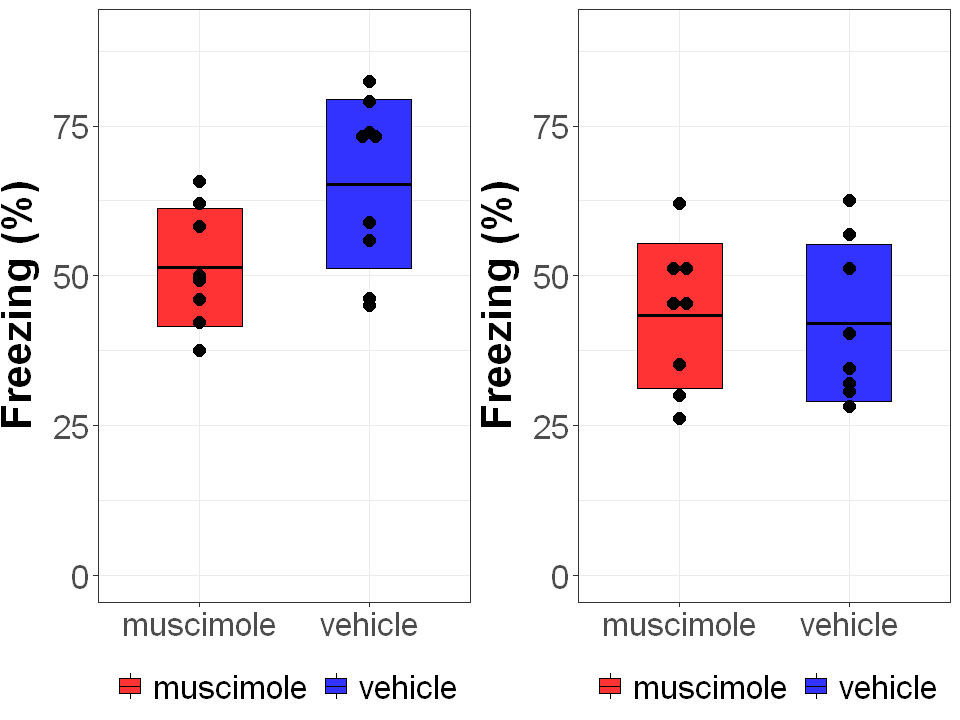

In [24]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.7
    dp_dotsize=3
    
    # y limits
    ylim1 = 0
    ylim2 = 90

#     ylim1 = -2
#     ylim2 = 90
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################

df.input = subset(df.set1, !is.na(infusion_pfc))
out2_1 = box_plot(df.input, "infusion_pfc","fz_ave", "stress", "no_stress","Freezing (%)")

df.input = subset(df.set1, !is.na(infusion_hpc))
out2_2 = box_plot(df.input, "infusion_hpc","fz_ave", "stress", "no_stress","Freezing (%)")

# plot the two plots
# set the size of final plot, width x height
plot_width = 8
plot_height = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out2_1, out2_2, ncol=2)

**Export the plot as an eps file**

In [25]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [21]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)
    
    return(temp.test)
}


df.input = subset(df.set1, !is.na(infusion_pfc))
temp = two_sample_t_test(df.input, "fz_ave",
                         "sex","male","infusion_pfc","muscimole",
                         "sex","male","infusion_pfc","vehicle")

df.input = subset(df.set1, !is.na(infusion_hpc))
temp = two_sample_t_test(df.input, "fz_ave",
                         "sex","male","infusion_hpc","muscimole",
                         "sex","male","infusion_hpc","vehicle")


### (male, 	muscimole) 	vs. (male, 	vehicle) 	###	p-value:  0.03179002 
### (male, 	muscimole) 	vs. (male, 	vehicle) 	###	p-value:  0.8474281 


---
## Step 8. Familiarity effects on synchronization
**Load R dataframe**

In [26]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  216 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lag

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Select records**<BR>
It's good to check using the data frame viewer in RStudio.

In [29]:
df.set1 <- subset(df, 
                  single_animal==FALSE & 
                  is.na(infusion_hpc)  &
                  is.na(infusion_pfc)  & 
                  # familiarity=='familiar' &
                  stress=='no_stress' &
                  lighting =='visible' & 
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

# Output as Excel file, not included with list
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data_set1"
save_files(df.input,path,base)

dimension:  65 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


**Plot Cohen D for local infusion of muscimol at either PFC or vHippo**

sex : male , familiarity : familiar , min: -1.067472 , mean: 1.856472 , max: 3.344061 , n: 19 , sd: 1.152362 
sex : male , familiarity : unfamiliar , min: NaN , mean: NaN , max: NaN , n: 16 , sd: NA 
sex : female , familiarity : familiar , min: -1.150091 , mean: 1.009998 , max: 2.437512 , n: 16 , sd: 1.098654 
sex : female , familiarity : unfamiliar , min: -1.650184 , mean: 0.9050432 , max: 2.35326 , n: 14 , sd: 1.31504 


Warning message:
"Removed 1 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 1 rows containing non-finite values (stat_bindot)."


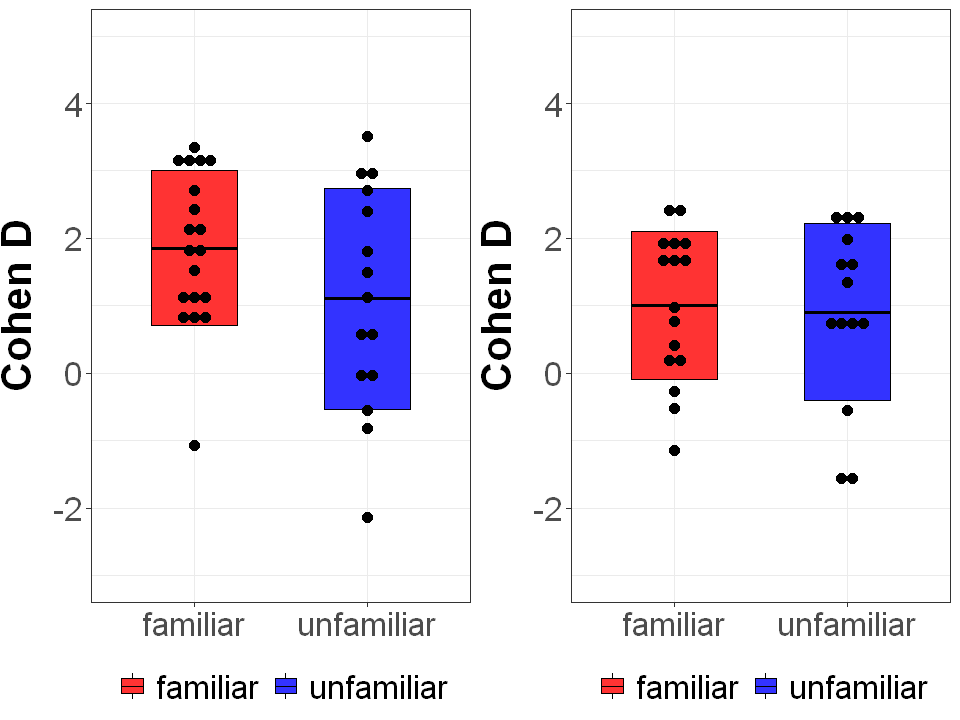

In [40]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.2
    dp_dotsize=0.8
    
    # y limits
#     ylim1 = -1.2
#     ylim2 = 4.0
    
    ylim1 = -3.0
    ylim2 = 5.0

    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################
# plot male
df.input = df.set1
x_col = "familiarity"            # x-axis is sex
y_col = "cohen_d"        # y-axis is cohen_d
select_col = "sex"
select_value = "male"  # limit records with stress in the stress column
y_axis_label = "Cohen D" # y-asix label

out1_1 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot female
df.input = df.set1
select_value = "female"

out1_2 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot the two plots together
# set the size of final plot, width x height
plot_width = 8
plot_height= 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out1_1, out1_2, ncol=2)



**Export the plot as an eps file**

In [41]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [35]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)

    return(temp.test)
}

df.input = df.set1
temp = two_sample_t_test(df.input, "cohen_d",
                        "sex","male","familiarity","familiar",
                        "sex","male","familiarity","unfamiliar")


df.input = df.set1
temp = two_sample_t_test(df.input, "cohen_d",
                        "sex","female","familiarity","familiar",
                        "sex","female","familiarity","unfamiliar")


### (male, 	familiar) 	vs. (male, 	unfamiliar) 	###	p-value:  0.1437038 
### (female, 	familiar) 	vs. (female, 	unfamiliar) 	###	p-value:  0.8158597 


---
**Compute the average from sub1 and sub2 freezing into a new column 'fz_ave'**

In [36]:
df.set1['fz_ave'] = (df.set1['fz_sub1'] + df.set1['fz_sub2']) / 2

#######################################
# Display summary
dis_summary(df.set1)

dimension:  65 27 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1,fz_ave
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<dbl>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19",43.64583
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8",40.52083


**plot the graphs**

sex : male , familiarity : familiar , min: 6.875 , mean: 40.07675 , max: 67.8125 , n: 19 , sd: 19.14976 
sex : male , familiarity : unfamiliar , min: 3.645833 , mean: 26.41276 , max: 45.3125 , n: 16 , sd: 13.0073 
sex : female , familiarity : familiar , min: 14.375 , mean: 47.08984 , max: 65.9375 , n: 16 , sd: 14.80528 
sex : female , familiarity : unfamiliar , min: 27.91667 , mean: 49.53125 , max: 82.29167 , n: 14 , sd: 17.79273 


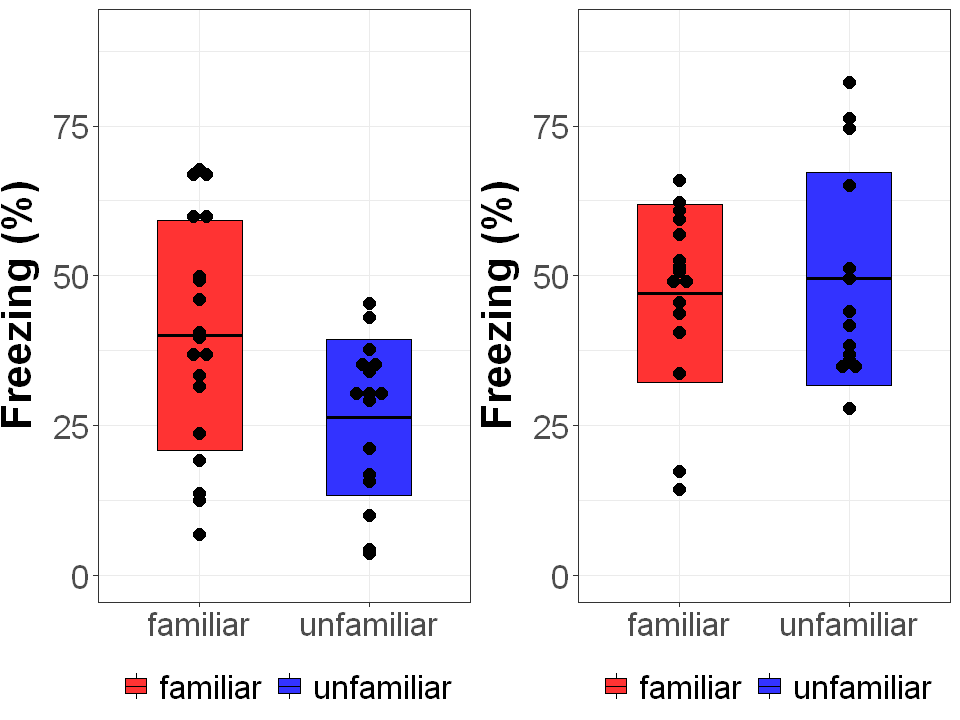

In [42]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.7
    dp_dotsize=3
    
    # y limits
    ylim1 = 0
    ylim2 = 90

#     ylim1 = -2
#     ylim2 = 90
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################

df.input = df.set1
out2_1 = box_plot(df.input, "familiarity","fz_ave", "sex", "male","Freezing (%)")

df.input = df.set1
out2_2 = box_plot(df.input, "familiarity","fz_ave", "sex", "female","Freezing (%)")

# plot the two plots
# set the size of final plot, width x height
plot_width = 8
plot_height = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out2_1, out2_2, ncol=2)

**Export the plot as an eps file**

In [43]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [39]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)
    
    return(temp.test)
}


df.input = df.set1
temp = two_sample_t_test(df.input, "fz_ave",
                         "sex","male","familiarity","familiar",
                         "sex","male","familiarity","unfamiliar")

df.input = df.set1
temp = two_sample_t_test(df.input, "fz_ave",
                         "sex","female","familiarity","familiar",
                         "sex","female","familiarity","unfamiliar")


### (male, 	familiar) 	vs. (male, 	unfamiliar) 	###	p-value:  0.01779413 
### (female, 	familiar) 	vs. (female, 	unfamiliar) 	###	p-value:  0.6887585 


---
## Step 9. Stess effects on synchronization
**Load R dataframe**

In [44]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  216 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lag

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Select records**<BR>
It's good to check using the data frame viewer in RStudio.

In [45]:
df.set1 <- subset(df, 
                  single_animal==FALSE & 
                  is.na(infusion_hpc)  &
                  is.na(infusion_pfc)  & 
                  familiarity=='familiar' &
                  # stress=='no_stress' &
                  lighting =='visible' & 
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

# Output as Excel file, not included with list
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data_set1"
save_files(df.input,path,base)

dimension:  57 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


**Plot Cohen D for local infusion of muscimol at either PFC or vHippo**

sex : male , stress : no_stress , min: -1.067472 , mean: 1.856472 , max: 3.344061 , n: 19 , sd: 1.152362 
sex : male , stress : stress , min: -1.809506 , mean: 0.2413453 , max: 2.296196 , n: 13 , sd: 1.112518 
sex : female , stress : no_stress , min: -1.150091 , mean: 1.009998 , max: 2.437512 , n: 16 , sd: 1.098654 
sex : female , stress : stress , min: 0.1903046 , mean: 2.225274 , max: 4.334237 , n: 9 , sd: 1.533727 


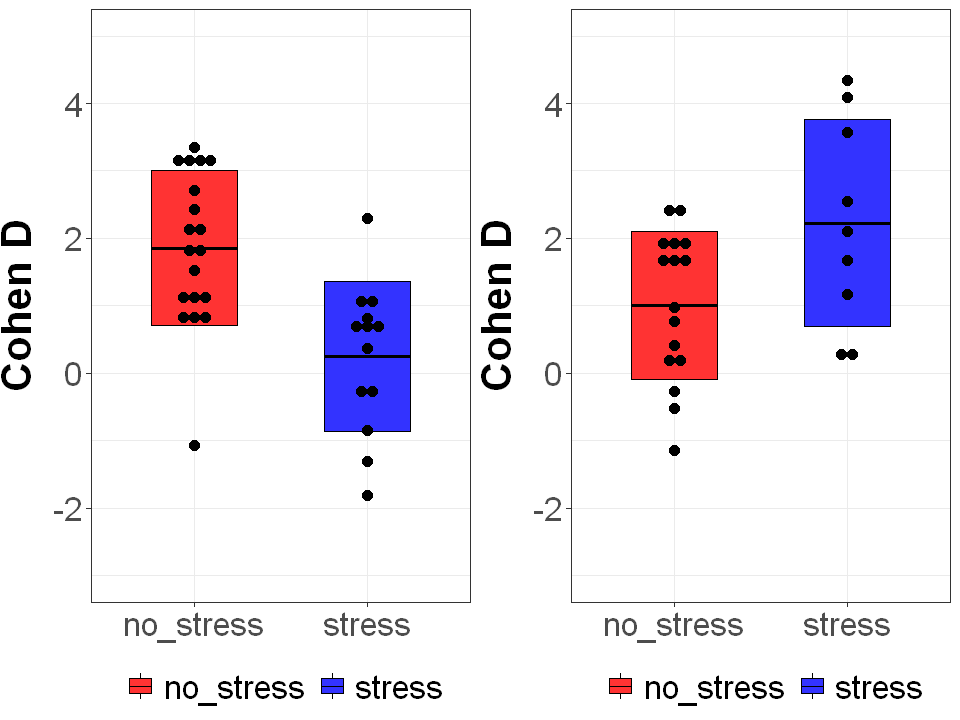

In [51]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.2
    dp_dotsize=0.8
    
    # y limits
#     ylim1 = -1.2
#     ylim2 = 4.0
    
    ylim1 = -3.0
    ylim2 = 5.0

    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################
# plot male
df.input = df.set1
x_col = "stress"            # x-axis is sex
y_col = "cohen_d"        # y-axis is cohen_d
select_col = "sex"
select_value = "male"  # limit records with stress in the stress column
y_axis_label = "Cohen D" # y-asix label

out1_1 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot female
df.input = df.set1
select_value = "female"

out1_2 = box_plot(df.input, x_col, y_col, select_col, select_value, y_axis_label)

# plot the two plots together
# set the size of final plot, width x height
plot_width = 8
plot_height= 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out1_1, out1_2, ncol=2)



In [52]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [47]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)

    return(temp.test)
}

df.input = df.set1
temp = two_sample_t_test(df.input, "cohen_d",
                        "sex","male","stress","stress",
                        "sex","male","stress","no_stress")


df.input = df.set1
temp = two_sample_t_test(df.input, "cohen_d",
                        "sex","female","stress","stress",
                        "sex","female","stress","no_stress")


### (male, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.0004843286 
### (female, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.05687947 


---
**Compute the average from sub1 and sub2 freezing into a new column 'fz_ave'**

In [48]:
df.set1['fz_ave'] = (df.set1['fz_sub1'] + df.set1['fz_sub2']) / 2

#######################################
# Display summary
dis_summary(df.set1)

dimension:  57 27 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1,fz_ave
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<dbl>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19",43.64583
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8",40.52083


**plot the graphs**

sex : male , stress : no_stress , min: 6.875 , mean: 40.07675 , max: 67.8125 , n: 19 , sd: 19.14976 
sex : male , stress : stress , min: 15 , mean: 39.21474 , max: 66.66667 , n: 13 , sd: 16.92778 
sex : female , stress : no_stress , min: 14.375 , mean: 47.08984 , max: 65.9375 , n: 16 , sd: 14.80528 
sex : female , stress : stress , min: 41.875 , mean: 65.69444 , max: 83.64583 , n: 9 , sd: 13.98066 


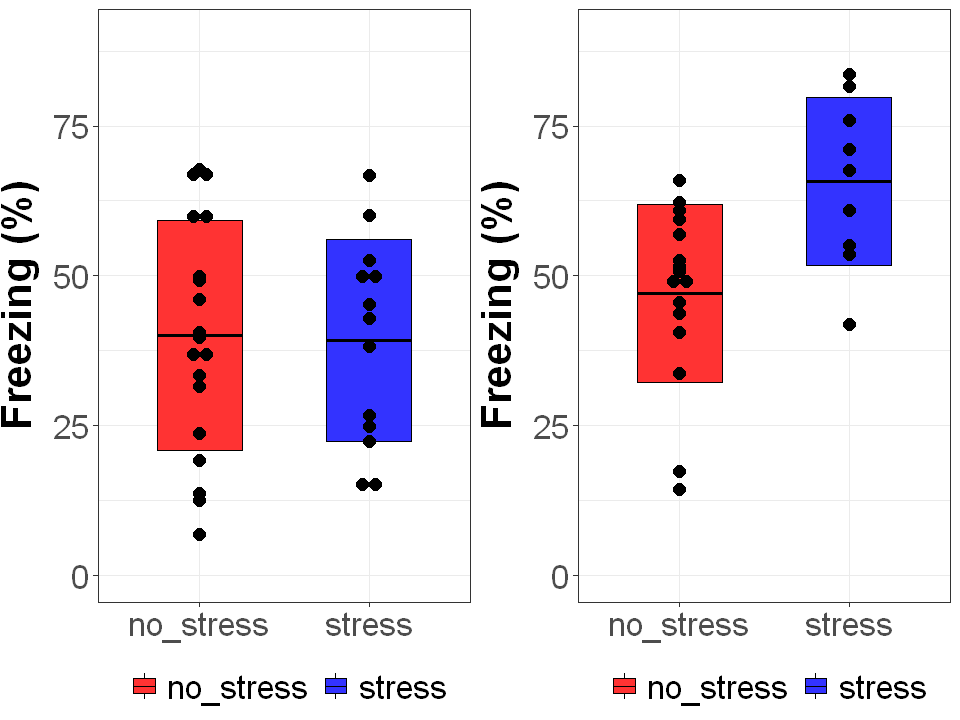

In [53]:
###################################################################################################
# Function box_plot
###################################################################################################
box_plot <- function(df.input, x1_col, y_col, select_col, select_value, yaxis_label){
    #######################################################
    # parameters to adjust graph
    # graph width x height
    # plot_width = 8
    # plot_height = 6

    # dotplot
    dp_binwidth=0.7
    dp_dotsize=3
    
    # y limits
    ylim1 = 0
    ylim2 = 90

#     ylim1 = -2
#     ylim2 = 90
    #######################################################
    
    # get column name
    x1 <- names(df.input)[which (colnames(df.input)==x1_col)]
    x2 <- names(df.input)[which (colnames(df.input)==select_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # set the size of final plot
    # options(repr.plot.width=plot_width, repr.plot.height=plot_height)

    df.temp = df.input[df.input[,x2]==select_value,]
    
    for (x1_value in unique(df.temp[,x1])){
        #print(min(df.temp[df.temp[,x1]==x1_value,y]))
        cat(x2,":",select_value,",", x1,":",x1_value,
            ", min:",min(df.temp[df.temp[,x1]==x1_value,y]),
            ", mean:",mean(df.temp[df.temp[,x1]==x1_value,y]),
            ", max:",max(df.temp[df.temp[,x1]==x1_value,y]),
            ", n:",length(df.temp[df.temp[,x1]==x1_value,y]),
            ", sd:",sd(df.temp[df.temp[,x1]==x1_value,y]),
            "\n")
    }
    
    
    # set data frame and axes
    ggp.output <- ggplot(df.temp, aes_string(x=x1, y=y, fill=x1))+
        # add boxplot with mean and SEM (MeanSEM) or SD (MeanSD).
        # stat_summary(fun.data=MeanSEM, geom="boxplot", colour="black", width=0.6)+
        stat_summary(fun.data=MeanSD, geom="boxplot", colour="black", width=0.5)+
        # Dotplot
        geom_dotplot(binaxis='y', stackdir='center', binwidth=dp_binwidth, dotsize=dp_dotsize, fill='black')+
        # y axis label
        labs(y=yaxis_label)+
        # Limit y axis range
        ylim(c(ylim1, ylim2))+

    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))
    
    return(ggp.output)
}

###################################################################################################
# START HERE
###################################################################################################

df.input = df.set1
out2_1 = box_plot(df.input, "stress","fz_ave", "sex", "male","Freezing (%)")

df.input = df.set1
out2_2 = box_plot(df.input, "stress","fz_ave", "sex", "female","Freezing (%)")

# plot the two plots
# set the size of final plot, width x height
plot_width = 8
plot_height = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out2_1, out2_2, ncol=2)

**Export the plot as an eps file**

In [54]:
# Output eps file on desktop
path = "C:/Users/User/Desktop"
base = "plot.eps"
filename = file.path(path, base)

ggsave(filename, device=cairo_ps,width=plot_width, height=plot_height)

**2-sample t-test**

In [50]:
two_sample_t_test <- function(df.input, y_col, xa1_col, xa1_value, xa2_col, xa2_value,xb1_col, xb1_value, xb2_col, xb2_value){
#############################################################
# 2 sample t-test for (y_col), between
#     (xa1_col) = xa1_value and (xa2_col) = xa2_value
#     (xb1_col) = xb1_value and (xb2_col) = xb2_value
#############################################################
    # get index for each column name
    xa1 <- names(df.input)[which (colnames(df.input)==xa1_col)]
    xa2 <- names(df.input)[which (colnames(df.input)==xa2_col)]
    xb1 <- names(df.input)[which (colnames(df.input)==xb1_col)]
    xb2 <- names(df.input)[which (colnames(df.input)==xb2_col)]
    y <- names(df.input)[which (colnames(df.input)==y_col)]
    
    # Extract data frame
    temp.a = df.input[,y][df.input[,xa1]==xa1_value & df.input[,xa2]==xa2_value]
    temp.b = df.input[,y][df.input[,xb1]==xb1_value & df.input[,xb2]==xb2_value]
    
    cat(paste0('### (',xa1_value,", \t",xa2_value, ") \tvs. (", xb1_value, ", \t", xb2_value, ") \t###\t"))
    temp.test <- t.test(temp.a, temp.b)
    cat("p-value: ",temp.test[["p.value"]],"\n")
    # detailed information
    #print(temp.test)
    
    return(temp.test)
}


df.input = df.set1
temp = two_sample_t_test(df.input, "fz_ave",
                         "sex","male","stress","stress",
                         "sex","male","stress","no_stress")

df.input = df.set1
temp = two_sample_t_test(df.input, "fz_ave",
                         "sex","female","stress","stress",
                         "sex","female","stress","no_stress")


### (male, 	stress) 	vs. (male, 	no_stress) 	###	p-value:  0.8943133 
### (female, 	stress) 	vs. (female, 	no_stress) 	###	p-value:  0.005970931 


---
## Step 10. Sex effects on distribution of lagtime for onset and offset of freezing
**Load R dataframe**

In [73]:
# Load DF
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data.Rda"
filename = file.path(path, base)
load(file=filename)

#######################################
# Display summary
dis_summary(df)

dimension:  216 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lag

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
1,20190408_testing_1_7a,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"253, 263, 287, 293, 311, 322, 331, 351, 378, 408, 463, 474, 527, 542, 640, 668, 715","262, 284, 290, 309, 314, 327, 340, 357, 397, 418, 470, 478, 538, 546, 648, 673, 720",,,,,,
2,20190408_testing_1_7b,TRUE,male,75,NA,NA,familiar,visible,FALSE,no_stress,...,0,NaN,"244, 267, 348, 397, 435, 501, 550, 616, 632, 706","265, 343, 389, 427, 494, 541, 590, 627, 688, 720",,,,,,


**Select records**<BR>
It's good to check using the data frame viewer in RStudio.

In [74]:
df.set1 <- subset(df, 
                  single_animal==FALSE & 
                  is.na(infusion_hpc) &
                  is.na(infusion_pfc) & 
                  familiarity=='familiar' &
                  lighting =='visible' &
                  stress =='no_stress' &
                  partition==FALSE &
                  exclude==FALSE)

#######################################
# Display summary
dis_summary(df.set1)

# Output data frame as well as Excel file (not included columns of list)
df.input = df.set1
path = "C:/Users/User/Dropbox/Jupyter/wataru/synchro_freeze"
base = "data_set1"
save_files(df.input,path,base)

dimension:  35 26 
   folder_videoname       single_animal                 sex                 age 
        "character"           "logical"         "character"           "integer" 
       infusion_hpc        infusion_pfc         familiarity            lighting 
        "character"         "character"         "character"         "character" 
          partition              stress             comment             exclude 
          "logical"         "character"         "character"           "logical" 
  together_alone_id together_alone_role             fz_sub1             fz_sub2 
           "factor"            "factor"           "numeric"           "numeric" 
         fz_overlap             cohen_d       fz_start_sub1         fz_end_sub1 
          "numeric"           "numeric"              "list"              "list" 
      fz_start_sub2         fz_end_sub2    lagt_start_s1_s2    lagt_start_s2_s1 
             "list"              "list"              "list"              "list" 
     lagt

,folder_videoname,single_animal,sex,age,infusion_hpc,infusion_pfc,familiarity,lighting,partition,stress,...,fz_overlap,cohen_d,fz_start_sub1,fz_end_sub1,fz_start_sub2,fz_end_sub2,lagt_start_s1_s2,lagt_start_s2_s1,lagt_end_s1_s2,lagt_end_s2_s1
,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,...,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<list>,<list>,<list>,<list>
5,20190408_testing_1_f10ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,18.95833,0.7708344,"249, 255, 267, 294, 331, 353, 364, 375, 403, 424, 430, 519, 550, 563, 577, 599, 634, 652, 689","253, 262, 272, 299, 338, 359, 368, 383, 409, 429, 435, 525, 558, 568, 594, 615, 640, 657, 694","264, 295, 303, 313, 321, 343, 398, 410, 425, 438, 482, 494, 517, 533, 557, 637, 652, 675, 685, 708","273, 302, 307, 317, 340, 389, 406, 419, 437, 468, 491, 502, 528, 555, 567, 642, 660, 680, 704, 713","15, 9, -3, 1, -10, -10, -21, 23, -5, 1, -5, -2, 7, -6, -20, 38, 3, 0, -4","3, -1, -9, 18, 10, 10, 5, -7, -1, -8, 37, 25, 2, -14, 6, -3, 0, 14, 4, -19","20, 11, 1, 3, 2, -19, 21, 6, -3, 8, 2, 3, -3, -1, -27, 27, 2, 3, 10","-1, -3, -8, -18, -2, -6, 3, -10, -2, -33, 34, 23, -3, 3, 1, -2, -3, 14, -10, -19"
8,20190408_testing_1_f6ab,FALSE,female,75,NA,NA,familiar,visible,FALSE,no_stress,...,22.08333,1.5967085,"267, 298, 341, 413, 536, 545, 560, 568, 580, 607, 630, 689, 712","272, 317, 407, 431, 543, 550, 565, 575, 586, 614, 675, 704, 720","289, 298, 338, 374, 516, 529, 550, 573, 584, 632, 646, 671, 704","296, 312, 363, 404, 521, 539, 564, 581, 595, 637, 651, 679, 712","22, 0, -3, -39, -7, 5, -10, 5, 4, -23, 2, 15, -8","9, 0, 3, -33, 20, 7, -5, -5, -4, -2, -16, 18, 8","24, -5, -3, -27, -4, -11, -1, 6, -5, -19, 4, 8, -8","21, 5, 44, 3, 22, 4, 1, 5, -9, -23, 24, -4, -8"


**collapse lagtime**

In [99]:
collapse_lagtime = function(df.input){
    #############################################
    # Collapse along rows
    #   and store 1x4 data frame (df.work)
    #   lagt_*: lagt_start_s1_s2, lagt_start_s2_s1, lagt_end_s1_s2, lagt_end_s2_s1 

    # Create working df and collapse cells in columns of "lagt_*"
    rex = "lagt_*"

    # Initialize dataframe
    df.work = data.frame(matrix(ncol = 4, nrow = 1))
    colnames(df.work) = str_subset(names(df.input), rex)

    # Collapse each column
    for (colname in str_subset(names(df.input), rex)){
        w = c() # working vector
        for (i in c(1:nrow(df.input))){
            w = c(w, unlist(df.input[i,colname]))
        }
        df.work[[1,colname]] = list(w)
    }

    #############################################
    # Collapse both directions, s1_s2 and s2_s1
    #   and store expanded data frame (1x6)
    for (colname in c("lagt_start", "lagt_end")){
        df.work[,colname] = NA # Append empty column
        w = c(unlist(df.work[1, paste0(colname, "_s1_s2")]),unlist(df.work[1,paste0(colname, "_s2_s1")]))
        df.work[[1,colname]]=list(w)
    }

    #############################################
    # Create New DF, df.test of lagtime and type (onset or offset)
    df.lagtime = data.frame("lagtime" = unlist(df.work[1,"lagt_start"]), "type" = "onset")
    # Append rows from onset
    df.lagtime = df.lagtime %>% add_row("lagtime" = unlist(df.work[1,"lagt_end"]), "type" = "offset")

    # convert frame number to sec
    df.lagtime[,"lagtime"] = df.lagtime[,"lagtime"] / 4

    # Display summary
    dis_summary(df.lagtime)
    
    return(df.lagtime)
}


df.input = df.set1[df.set1[,'sex']=='male',]
df.lag_male = collapse_lagtime(df.input)
df.lag_male[,'sex'] = 'male'

df.input = df.set1[df.set1[,'sex']=='female',]
df.lag_female = collapse_lagtime(df.input)
df.lag_female[,'sex'] = 'female'

# Concatenate data frame
df.lagtime = rbind(df.lag_male, df.lag_female)



dimension:  1074 2 
    lagtime        type 
  "numeric" "character" 
dimension:  978 2 
    lagtime        type 
  "numeric" "character" 


**Change order of individual variables**<BR>
    Explicitly set the order in individual valiables

In [104]:
df.lagtime <- within(df.lagtime, sex <- factor(sex, levels = c("male","female")))

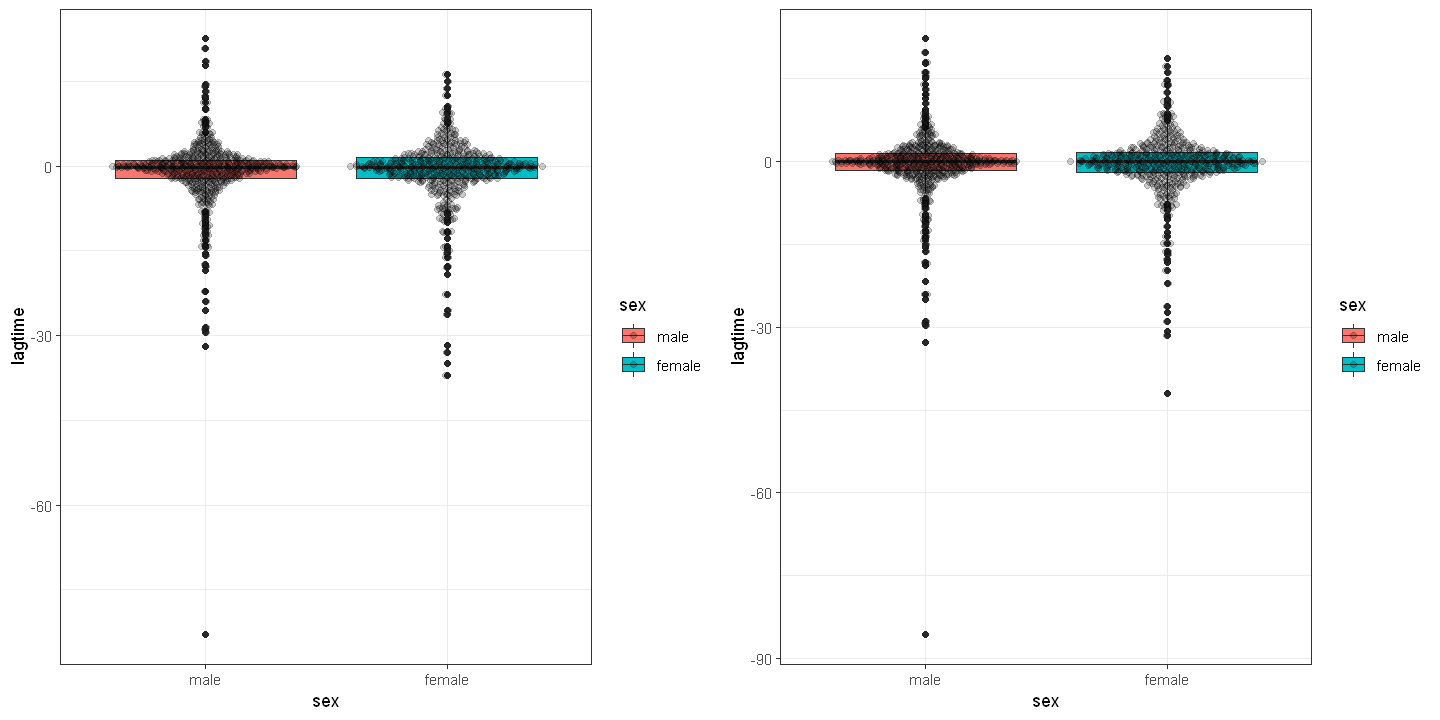

In [115]:
plot_dist = function(df.input){
    ylim1 = 0
    ylim2 = 130
    binwidth_value = 1

    ggp.output = ggplot(df.input,aes(x=sex,y=lagtime,fill=sex)) +
     geom_boxplot() +
     geom_quasirandom(alpha = 0.2) +
     theme_bw()
    
    return(ggp.output)

}


df.input =  df.lagtime[df.lagtime[,'type']=='onset',]
out10_1 = plot_dist(df.input)

df.input =  df.lagtime[df.lagtime[,'type']=='offset',]
out10_2 = plot_dist(df.input)

# plot the two plots together
# set the size of final plot, width x height
plot_width = 12
plot_= 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out10_1, out10_2, ncol=2)

Warning message:
"Removed 4 rows containing missing values (geom_bar)."
Warning message:
"Removed 4 rows containing missing values (geom_bar)."


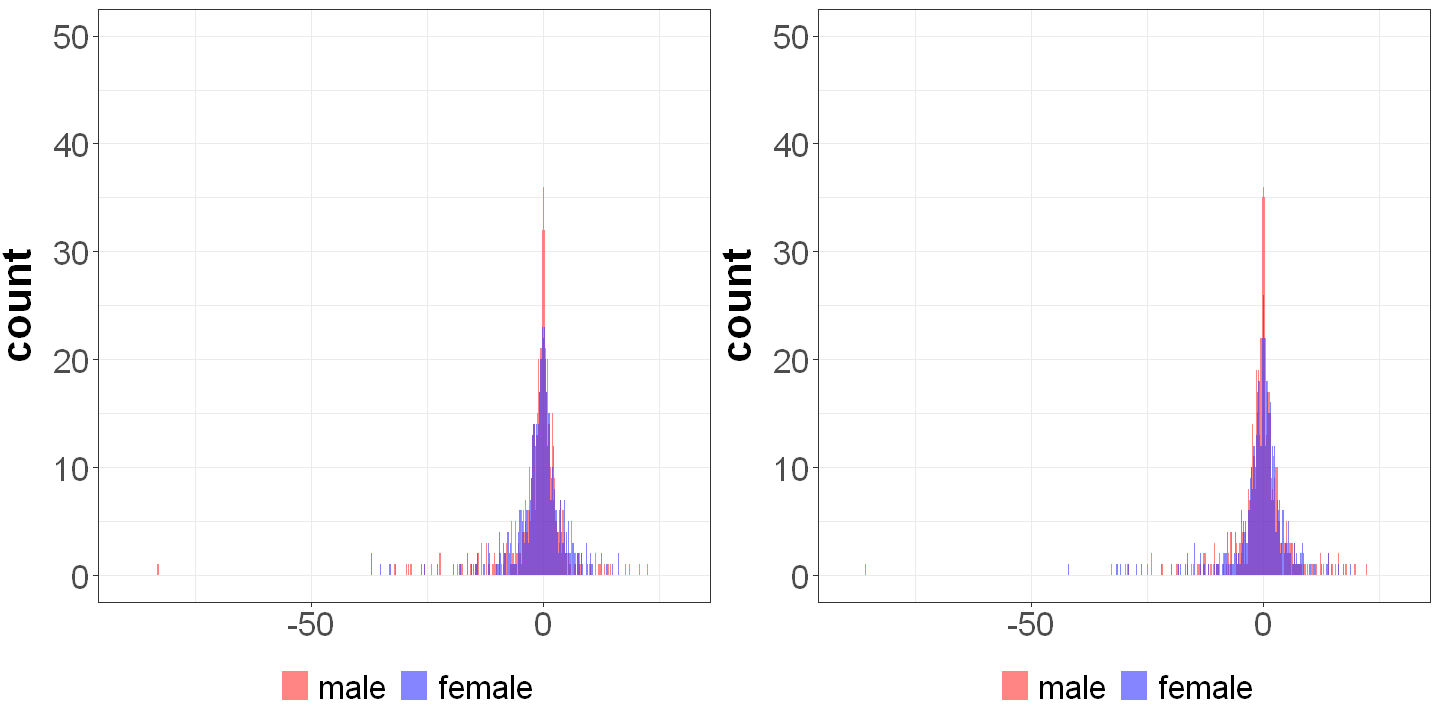

In [167]:
plot_hist = function(df.input){
xlim1 = -90
xlim2 = 30

ylim1 = 0
ylim2 = 50
binwidth_value = 0.25

ggp.output = ggplot(df.input,aes(x=lagtime,fill=sex)) +
    geom_histogram(binwidth=binwidth_value, alpha=0.6, position="identity") +
    xlim(c(xlim1,xlim2)) + ylim(c(ylim1,ylim2)) +

    
    # Remainings are all the same. No need to modify.
        # Change filling color for box
        scale_fill_manual(values=c("#FF3333", "#3333FF"))+
        # Change theme. Look at "Complete themes" above.
        theme_bw()+
        # Control of axes
        theme(
            axis.title.x = element_blank(),
            axis.title.y = element_text(size=25,vjust=2,face='bold'),
            axis.text=element_text(size=20))+    
        # Control of legend
        theme(
            #legend.position = "none",
            legend.position = 'bottom',
            legend.direction = "horizontal",
            #legend.title = element_text(size=20,face='bold'),
            legend.title = element_blank(),
            legend.text=element_text(size=20))

    return(ggp.output)
}


df.input = df.lagtime[df.lagtime$type=='onset',]
out10_3 = plot_hist(df.input)

df.input = df.lagtime[df.lagtime$type=='offset',]
out10_4 = plot_hist(df.input)

# plot the two plots
# set the size of final plot, width x height
plot_width = 12
plot_height = 6
options(repr.plot.width=plot_width, repr.plot.height=plot_height)

ggarrange(out10_3, out10_4, ncol=2)

### 2-3. Test Coefficients of Variation from multiple samples
https://cran.r-project.org/web/packages/cvequality/vignettes/how_to_test_CVs.html

**Need to install packages**

`install.packages("ggbeeswarm")`<BR>
`install.packages("cvequality")`


In [147]:
install.packages("cvequality")

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'cvequality' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpMNckUw\downloaded_packages


In [163]:
# Load required library
library(cvequality)

df.input = df.lagtime[df.lagtime$type=='onset',]
test1 <- with(df.input,asymptotic_test(lagtime,sex))
test1
test2 <- with(df.input,mslr_test(nr = 1e4, lagtime,sex))
test2

df.input = df.lagtime[df.lagtime$type=='offset',]
test1 <- with(df.input,asymptotic_test(lagtime,sex))
test1
test2 <- with(df.input,mslr_test(nr = 1e4, lagtime,sex))
test2

$D_AD
[1] 0.0004783657

$p_value
[1] 0.9825504

$MSLRT
[1] 43.42617

$p_value
[1] 4.402612e-11

$D_AD
[1] 0.004765642

$p_value
[1] 0.9449629

$MSLRT
[1] 18.41579

$p_value
[1] 1.775803e-05

---
## 2. Visualize the distribution of lagtime for onset and offset of freezing
### 2-1. Collapse the all cells in lagt_* columns and create a new DF of two columns (lagtime, type)

In [4]:
# Create working df and collapse cells in columns of "lagt_*"
rex = "lagt_*"

# Initialize dataframe
df.work = data.frame(matrix(ncol = 4, nrow = 1))
colnames(df.work) = str_subset(names(df), rex)

# Collapse each column
for (colname in str_subset(names(df), rex)){
    w = c() # working vector
    for (i in c(1:nrow(df))){
        # w = c(w, as.integer(unlist(df[i,colname])))
        w = c(w, unlist(df[i,colname]))
    }
    df.work[[1,colname]] = list(w)
}

# Mearge both directions, s1_s2 and s2_s1
for (colname in c("lagt_start", "lagt_end")){
    df.work[,colname] = NA # Append empty column
    # w = c(as.integer(unlist(df.work[1, paste0(colname, "_s1_s2")])),as.integer(unlist(df.work[1,paste0(colname, "_s2_s1")])))
    w = c(unlist(df.work[1, paste0(colname, "_s1_s2")]),unlist(df.work[1,paste0(colname, "_s2_s1")]))
    df.work[[1,colname]]=list(w)
}

# Create New DF, df.test of lagtime and type (onset or offset)
df.lagtime = data.frame("lagtime" = unlist(df.work[1,"lagt_start"]), "type" = "onset")
# Append rows from onset
df.lagtime = df.lagtime %>% add_row("lagtime" = unlist(df.work[1,"lagt_end"]), "type" = "offset")

# convert frame number to sec
df.lagtime[,"lagtime"] = df.lagtime[,"lagtime"] / 4

### 2-2. Visualize

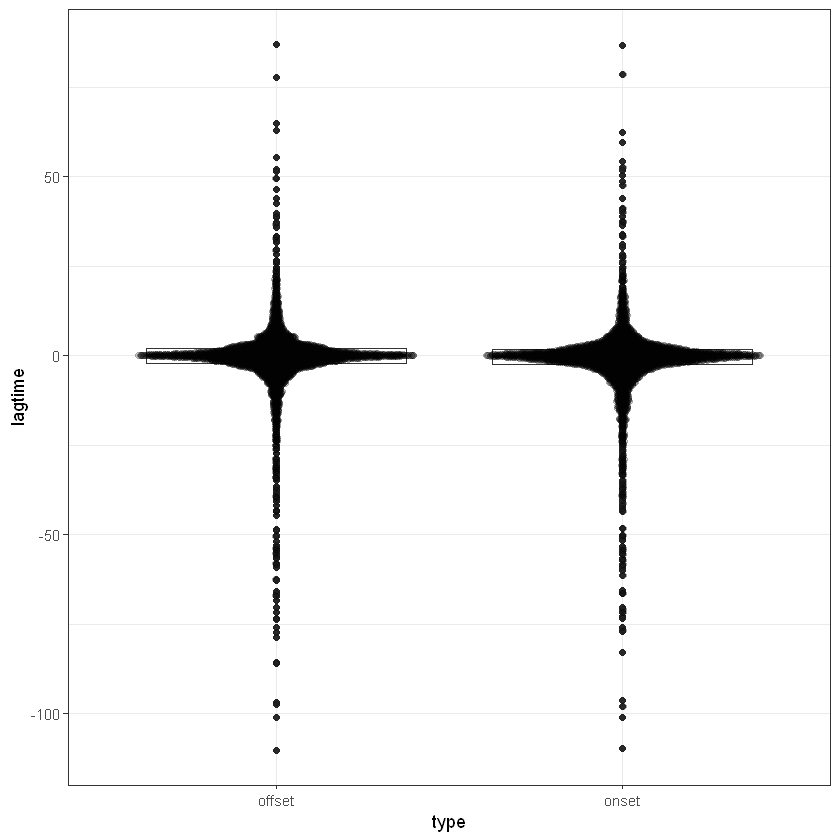

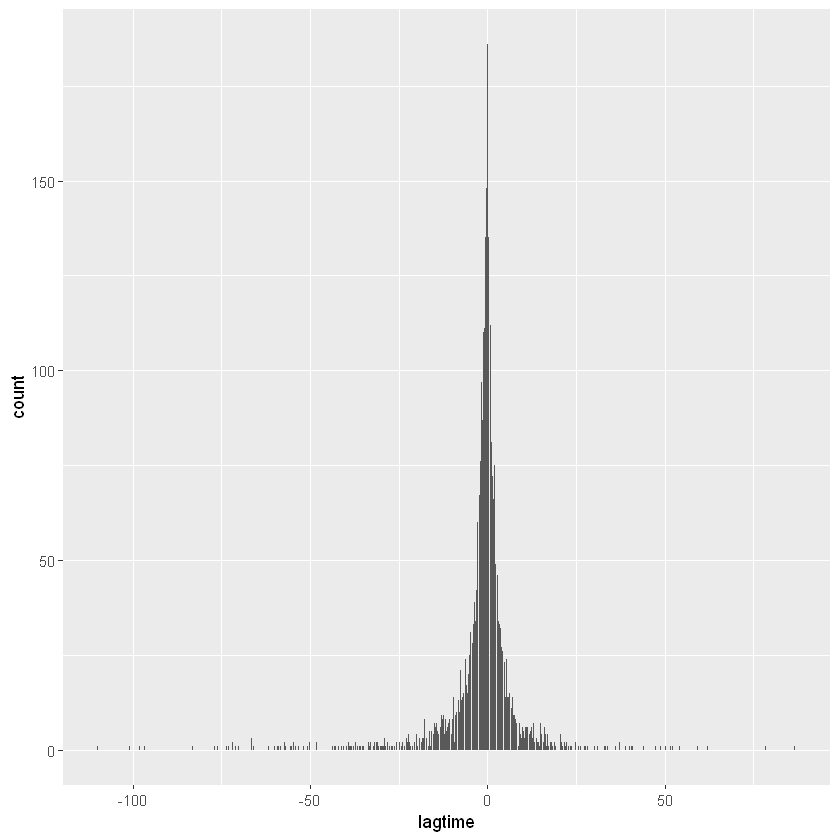

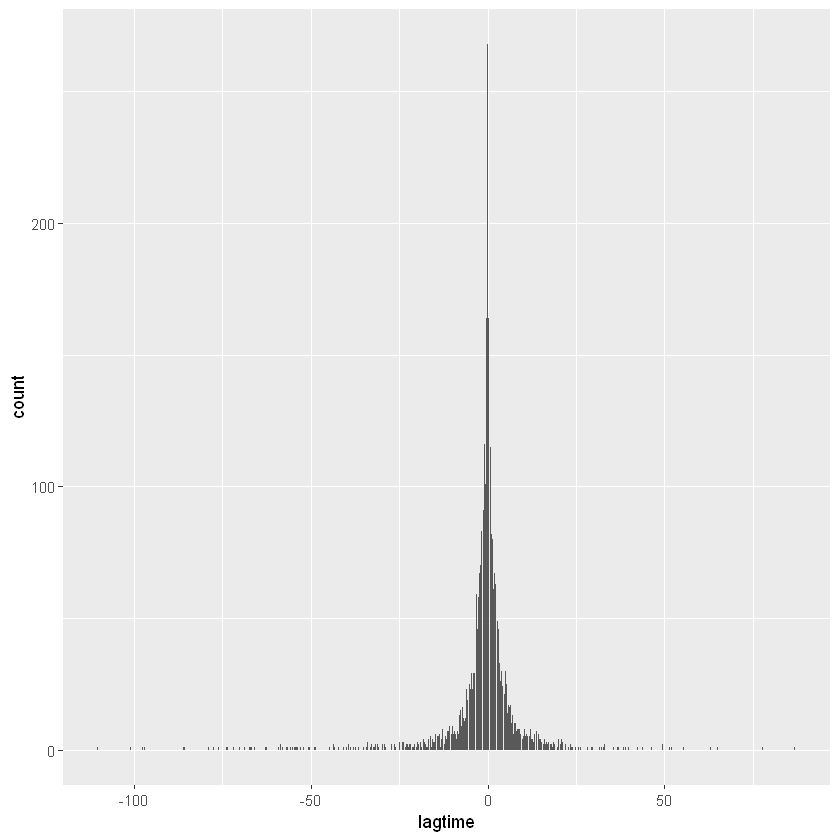

In [5]:
# Plot the distribution
library(ggplot2)
library(ggbeeswarm)

ggplot(df.lagtime,aes(type,lagtime)) +
 geom_boxplot() +
 geom_quasirandom(alpha = 0.2) +
 theme_bw()

# # Colored Histogram with Different Number of Bins
sub.lagtime = df.lagtime[df.lagtime$type=='onset',]
ggplot(sub.lagtime,aes(x=lagtime)) +
    geom_histogram(binwidth=0.2)

sub.lagtime = df.lagtime[df.lagtime$type=='offset',]
ggplot(sub.lagtime,aes(x=lagtime)) +
    geom_histogram(binwidth=0.2)

# hist(subTest$lagtime, breaks=seq(,,10),col="blue", xlim=c(-250,250), ylim=c(0,3000))
#, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))
# hist(subTest$lagtime, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))

# subTest = test[test$type=='offset',]
# hist(subTest$lagtime, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))


# ### (Option) Export a plot as EPS file ##############################################
# # Change the plot line
# setEPS()
# postscript("whatever.eps")
# plot(rnorm(100), main="Hey Some Data")
# dev.off()
# #####################################################################################


### 2-3. Test Coefficients of Variation from multiple samples
https://cran.r-project.org/web/packages/cvequality/vignettes/how_to_test_CVs.html

**Need to install packages**

`install.packages("ggbeeswarm")`<BR>
`install.packages("cvequality")`


In [6]:
install.packages("cvequality")

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'cvequality' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpwV3vWv\downloaded_packages


In [7]:
# Load required library
library(cvequality)

test1 <- with(df.lagtime,asymptotic_test(lagtime,type))
test1

$D_AD
[1] 2.660779

$p_value
[1] 0.1028504

In [8]:
test2 <- with(df.lagtime,mslr_test(nr = 1e4, lagtime,type))
test2

$MSLRT
[1] 207.4344

$p_value
[1] 0

---
# r-plotmaking
       20200501 am
#### Required package
- **Hmisc package**: Contains many functions useful for data analysis, high-level graphics, utility operations, functions for computing sample size and power, importing and annotating datasets, imputing missing values, advanced table making, variable clustering, character string manipulation, conversion of R objects to LaTeX and html code, and recoding variables.<BR> https://cran.r-project.org/web/packages/Hmisc/index.html

In [28]:
# Install packages
install.packages("Hmisc")

#load necessary libraries and packages
library(ggplot2)
library(Hmisc)
library(readxl)

Installing package into 'C:/Users/User/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'Hmisc' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Hmisc'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\User\Documents\R\win-library\3.6\00LOCK\Hmisc\libs\x64\Hmisc.dll to C:\Users\User\Documents\R\win-library\3.6\Hmisc\libs\x64\Hmisc.dll: Permission denied"
Warning message:
"restored 'Hmisc'"



The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpywQPJw\downloaded_packages


Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:base':

    format.pval, units




## 1. plotting LTP data using means and SEM

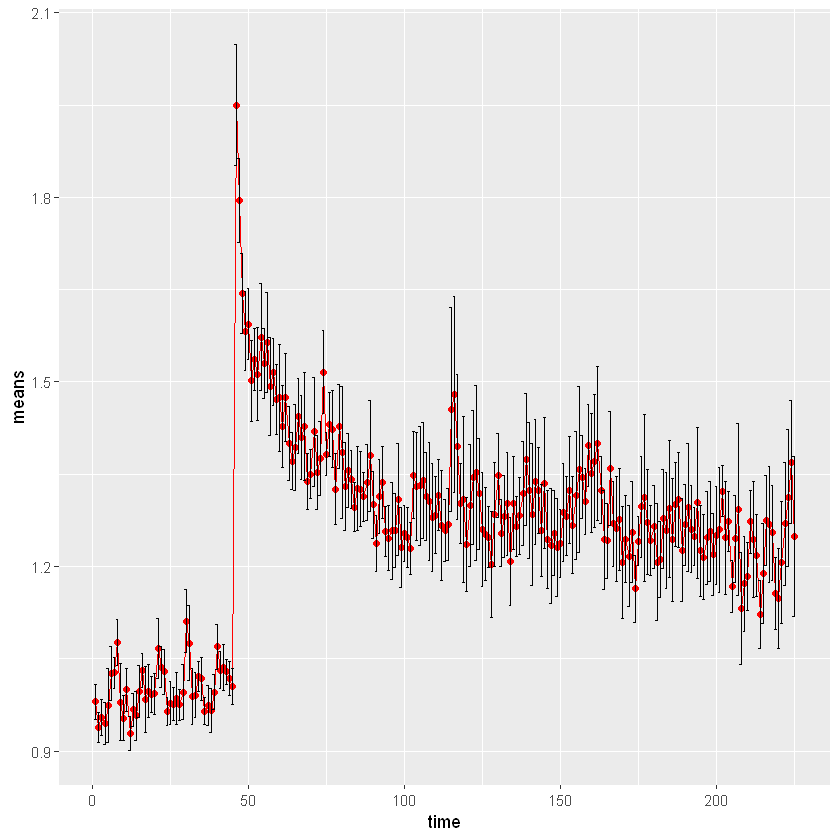

In [29]:
# 1. plotting LTP data using means and SEM

# 1-1. Read csv file named LTPtest
path = "C:/Users/User/Dropbox/Jupyter/alexei/r_plotmaking_data"
base = "LTPtest.csv"
filename = file.path(path, base)
LTP <- read.csv(filename)

# 1-2. Make line plot
p<-ggplot(LTP, aes(x=time, y=means))+geom_line(stat="identity",color="red") + geom_point(color="red") + geom_errorbar(aes(ymin=means-SEM, ymax=means+SEM))
print(p)

## 2. making dot plot with error bars using table with individual data points

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



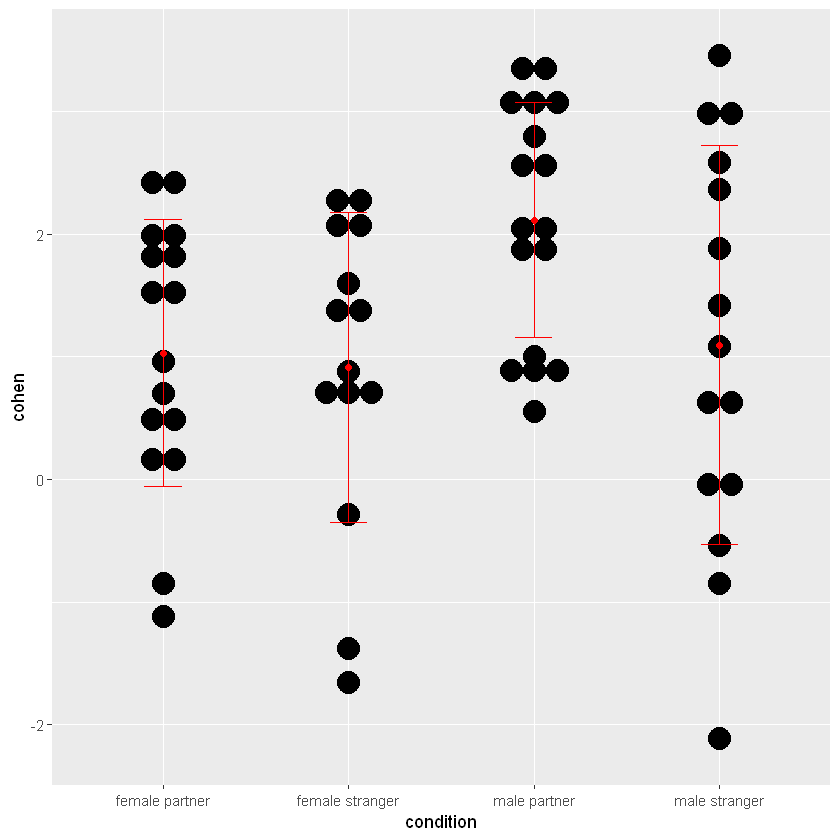

In [30]:
# 2. making dot plot with error bars using table with individual data points

# 2-1. import data from excel as df1 using "Import Dataset" function in Environment tab, one column containing datapoints, other columns containing independent variables
base = "synchfreeze_aggregated.xlsx"
filename = file.path(path, base)
df1 <- read_excel("C:/Users/User/Dropbox/Jupyter/alexei/r_plotmaking_data/synchfreeze_aggregated.xlsx", 
  sheet = "for Rplot")

# 2-2. plotting cohen distance with "condition" as factor
p <- ggplot(df1, aes(x=condition, y=cohen)) + 
  geom_dotplot(binaxis='y', stackdir='center')

p + stat_summary(fun.data=mean_sdl, fun.args = list(mult=1), 
                 geom="errorbar", color="red", width=0.2) +
  stat_summary(fun.y=mean, geom="point", color="red")

## 3. plotting paired comparisons of freezing between mice tested alone or in pairs

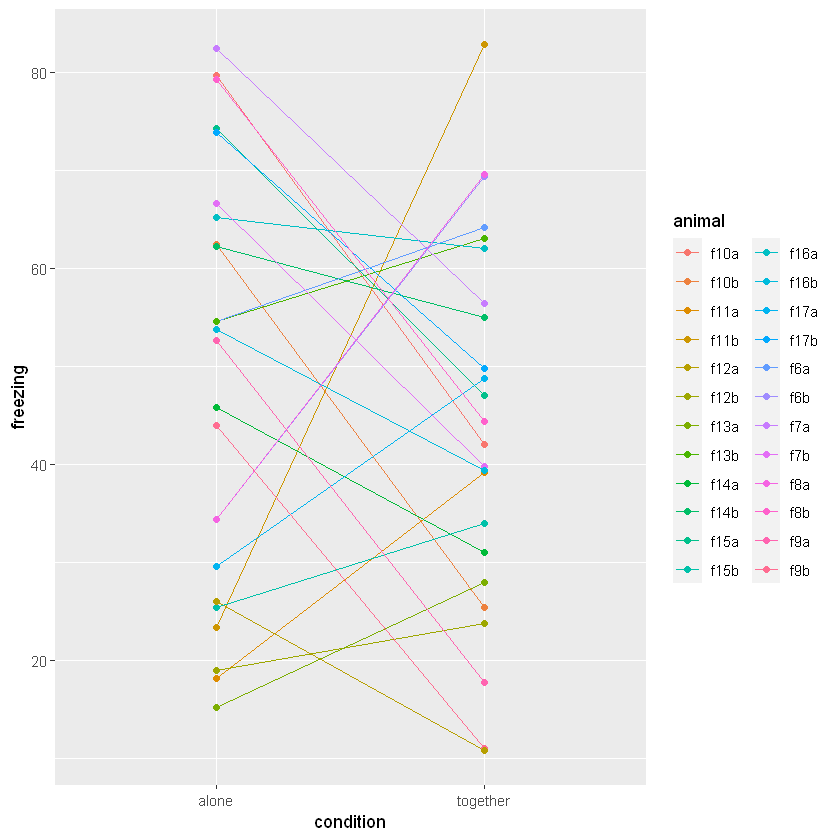

In [31]:
# 3. plotting paired comparisons of freezing between mice tested alone or in pairs

# 3-1. load excel file
# library(readxl)
base = "freezing_ind_vs_pair_for_Rplot.xlsm"
filename = file.path(path, base)
df1 <- read_excel(filename, sheet = "females")

# 3-2. plot pair comparisons
p<- ggplot(df1, aes(x=condition, y=freezing, group=animal, color=animal)) + 
  geom_line() + geom_point()
print(p)

## (Option) Export a plot as EPS file

In [ ]:
### (Option) Export a plot as EPS file ##############################################
# Change the plot line
setEPS()
postscript("whatever.eps")
# plot(rnorm(100), main="Hey Some Data")
print(p)
dev.off()
#####################################################################################

---
# One-Sample Wilcoxon Signed Rank Test in R
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r

In [ ]:
# We want to know, if the average of the data differs from mu (two-tailed test).

# One-sample wilcoxon test
res <- wilcox.test(df.lagtime$V1, mu = 44)
# Printing the results
res

---
# Boxplot for the distribution of lagtime for each animal pair.

In [ ]:
# Raw data for lag-time
# "s" stands for onset and "e" stands for offset of freezing
d1 <- c( 0,    -24,    3,    0,   16,    8,    9,   -3,    5,    4,   -3,   -1,  -2 )
e1 <- c("f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s") 

d2 <- c(   0,   -9,    0,    0,   13,    0,    0,    4,    2,   -1,   -8,   3)
e2 <- c("f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e") 

d3 <- c(14,-1,9,8,-7,0,-8,0,0,-18,0)
e3 <- c("f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s")

d4 <- c(     13,      10,      -3,     -11,      -9,       1,      -3,       3,     -18,      -6,       4,     0)
e4 <- c("f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e") 

d5 <- c(3,4,0,4,3,1,0,-8,-4,5,11)
e5 <- c("f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s")

d6 <- c(3,1,0,1,1,0,0,-9,-12,3,-2)
e6 <- c("f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e")

d7 <- c(-3,-1,-7,11,-11,3,-13,-2)
e7 <- c("f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s")

d8 <- c(-7,0,-2,2,-7,2,-6,0)
e8 <- c("f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e")

d9 <- c(3,-12,4,-2,5)
e9 <- c("f3_2s","f3_2s","f3_2s","f3_2s","f3_2s")

d10 <- c(-1,-3,0,-12)
e10 <- c("f3_2e","f3_2e","f3_2e","f3_2e")

d11 <- c(-11,-14,11,16,-57,19)
e11 <- c("f4_1s","f4_1s","f4_1s","f4_1s","f4_1s","f4_1s")

d12 <- c(-16,-10,-25,-1,0)
e12 <- c("f4_1e","f4_1e","f4_1e","f4_1e","f4_1e")

d13 <- c(3,-4,-18,18)
e13 <- c("f4_2s","f4_2s","f4_2s","f4_2s")

d14 <- c(8,3,-13,16,0)
e14 <- c("f4_2e","f4_2e","f4_2e","f4_2e","f4_2e")

# Concatenate the data
d <- c(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14)
e <- c(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14)

# Create data frame
mydata <- data.frame(d,e)
# Add column names
names(mydata) <- c("s1_s2","pair")

mydata

In [ ]:
# Boxplot for the distribution of lag-time
library(ggplot2)
library(ggbeeswarm)

ggplot(mydata,aes(pair,s1_s2)) + geom_boxplot() + geom_quasirandom(alpha = 0.9) + theme_bw()

### (Option) Export a plot as EPS file ##############################################
# Change the plot line
setEPS()
postscript("whatever.eps")
plot(rnorm(100), main="Hey Some Data")
dev.off()
#####################################################################################

---

# R version

In [ ]:
version

---
# Read csv file and test correlation
The csv file is generated by MATLAB code

[READING IN DATA FROM AN EXTERNAL FILE | R LEARNING MODULES](https://stats.idre.ucla.edu/r/modules/reading-in-data-from-an-external-file/)

In [ ]:
test <- read.table('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\myFile.txt', sep = ",")

In [ ]:
ccf(test[,1], test[,3], lag = 200000, ylim = range(-1,1), type="correlation")

In [ ]:
testTS <- ts(test)

In [ ]:
length(testTS)
str(testTS)
class(testTS)
names(testTS)
testTS

In [ ]:
test <- read.table('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\myFile.txt', sep = ",")

In [ ]:
data (sales)  # parts of Example 11.2.2 from Brockwell and Davies (1991).
sal <- diff (sales)
led <- diff(lead)
ccf (led, sal, lag = 20, ylim = range(-1,1), type="o")

In [ ]:
set.seed(123)
x = arima.sim(model=list(0.2, 0, 0.5), n = 100)
y = arima.sim(model=list(0.4, 0, 0.4), n = 100)
ccf(x, y, type="correlation")

In [ ]:
readClipboard()

In [ ]:
# setwd("D:/wataru/Recording_Analysis/Bases_dmPFC-BLA")
# theta <- scan('test.txt')
# plot(theta)

theta <- scan('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\test.txt')
plot(theta)

---
# Data Types
https://www.statmethods.net/input/datatypes.html

In [ ]:
######################################################
# vectors
a <- c(1,2,5.3,6,-2,4) # numeric vector
b <- c("one","two","three") # character vector
c <- c(TRUE,TRUE,TRUE,FALSE,TRUE,FALSE) #logical vector

# Identify rows, columns or elements using subscripts.
a[4]
a[c(2,4)]

######################################################
# matrix
# generates 5 x 4 numeric matrix 
y<-matrix(1:20, nrow=5,ncol=4)
# another example
cells <- c(1,26,24,68)
rnames <- c("R1", "R2")
cnames <- c("C1", "C2") 
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE,
  dimnames=list(rnames, cnames))

# Identify rows, columns or elements using subscripts.
x[,4] # 4th column of matrix
x[3,] # 3rd row of matrix 
x[2:4,1:3] # rows 2,3,4 of columns 1,2,3

######################################################
# Data Frames
# A data frame is more general than a matrix, in that different columns can have different
# modes (numeric, character, factor, etc.). This is similar to SAS and SPSS datasets.

d <- c(1,2,3,4)
e <- c("red", "white", "red", NA)
f <- c(TRUE,TRUE,TRUE,FALSE)
mydata <- data.frame(d,e,f)
names(mydata) <- c("ID","Color","Passed") # variable names

# Identify rows, columns or elements using subscripts.
mydata[2:3] # columns 3,4,5 of data frame
mydata[c("ID","Passed")] # columns ID and Age from data frame
mydata$Color # variable x1 in the data frame
mydata[1,3]

######################################################
# The ls() function returns a vector listing lists all the objects (vectors, data frames, etc) in your current workspace.
ls()

# Remove these three objects
rm("first_name", "last_name", "new_df")
 
# Or remove objects listed in a vector
rm(list = c("first_name", "last_name", "new_df"))
 
# Or remove all files from your workspace
rm(list = ls())
 
# Or remove vectors programmatically.  Delete objects with underscore in name
rm(list = ls()[grepl("_", ls())])

######################################################
# Lists
# An ordered collection of objects (components). A list allows you to gather a variety of 
# (possibly unrelated) objects under one name.
# example of a list with 4 components - 
# a string, a numeric vector, a matrix, and a scaler 

w <- list(name="Fred", mynumbers=a, mymatrix=y, age=5.3)

# example of a list containing two lists
# It looks concatenate the two lists
v <- c(w,w)

# Identify elements of a list using the [[]] convention.
mylist[[2]] # 2nd component of the list
mylist[["mynumbers"]] # component named mynumbers in list



######################################################
# Factors
# Tell R that a variable is nominal by making it a factor. The factor stores the nominal
# values as a vector of integers in the range [ 1... k ] (where k is the number of unique 
# values in the nominal variable), and an internal vector of character strings (the original 
# values) mapped to these integers.

# variable gender with 20 "male" entries and 
# 30 "female" entries 
gender <- c(rep("male",20), rep("female", 30)) 
gender <- factor(gender) 
# stores gender as 20 1s and 30 2s and associates
# 1=female, 2=male internally (alphabetically)
# R now treats gender as a nominal variable 
summary(gender)
